<a href="https://colab.research.google.com/github/Laxmikurapati/Machine-learning-Projects/blob/main/Mulitple_models_use_for_predicting_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lifecycle in A Data Science Projects

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment


#**1.Data Analysis Phase** 

In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
!pip install tensorflow 
from openpyxl import Workbook,load_workbook
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

     
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
dataset=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(1460, 81)


In [88]:
## print the top5 records
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


#**2.Missing Values**

In [89]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')
    

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


### Since they are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagram for this relationship


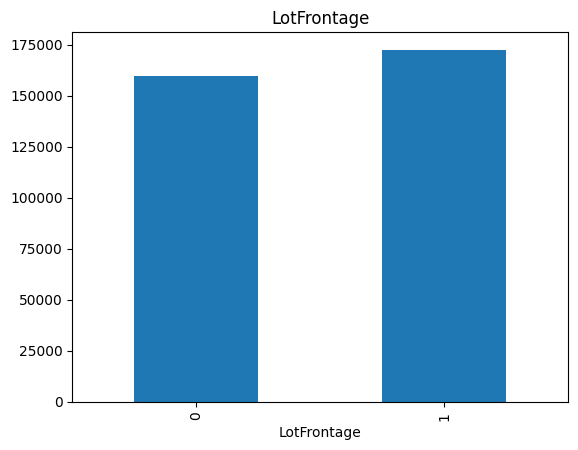

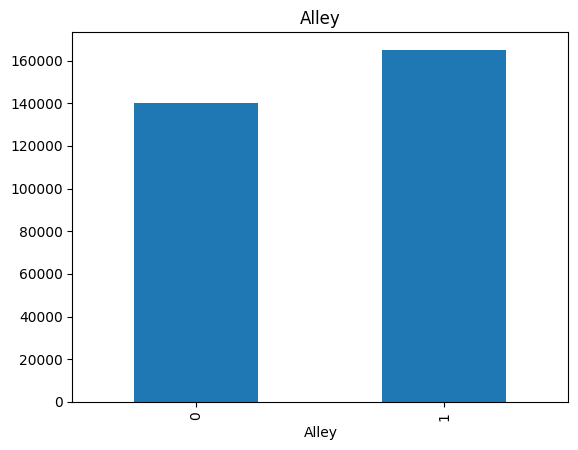

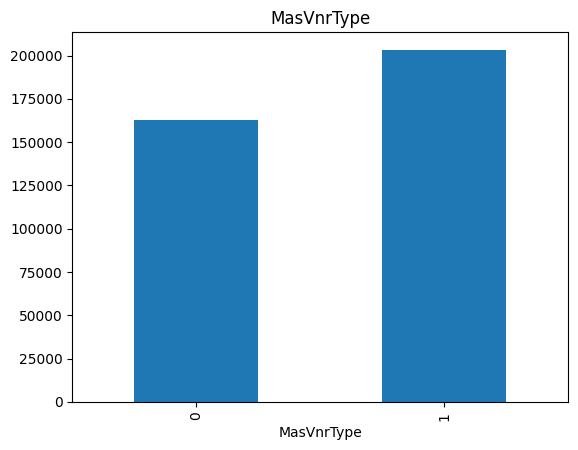

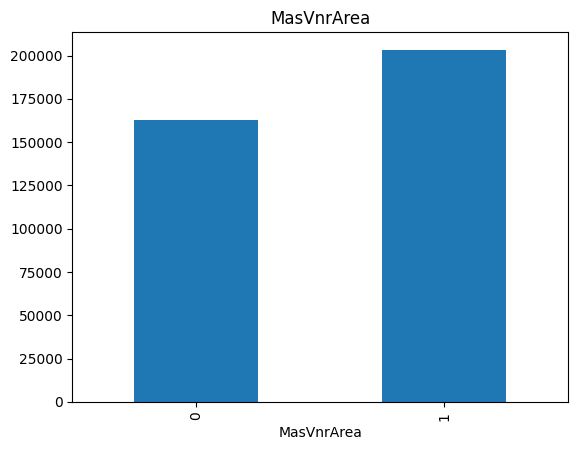

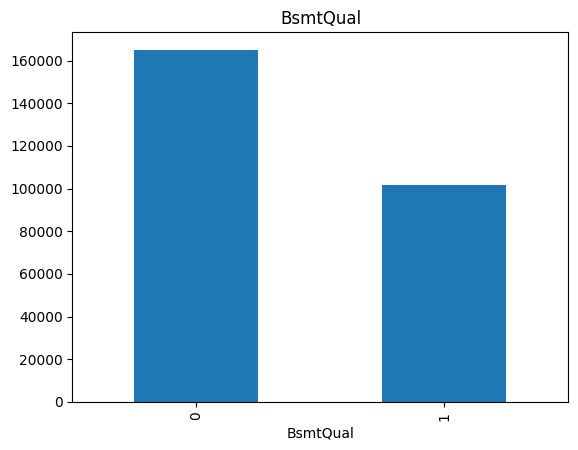

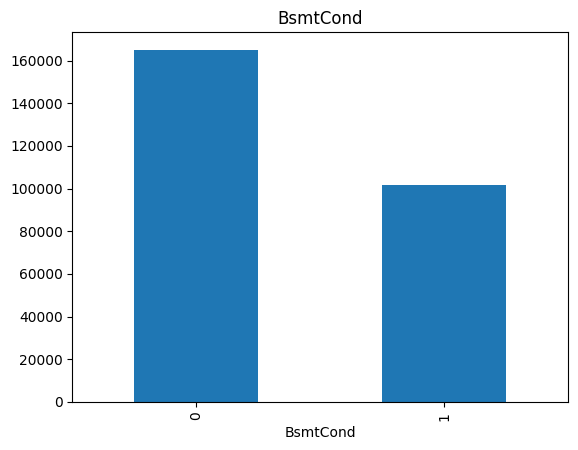

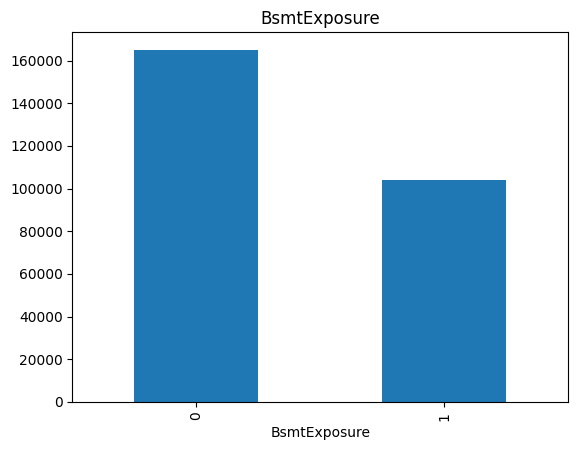

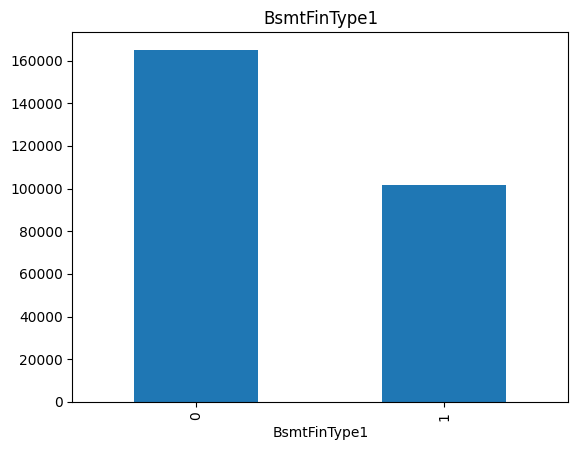

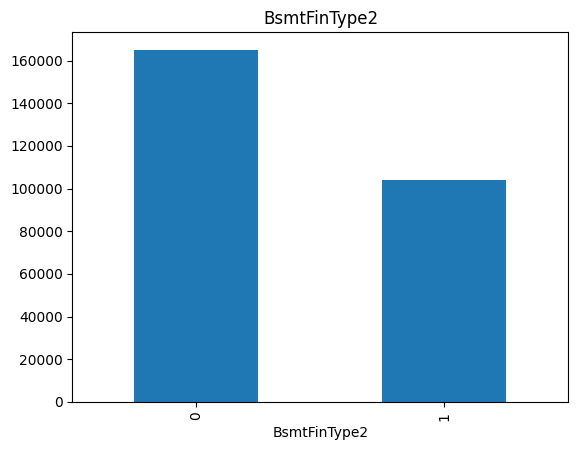

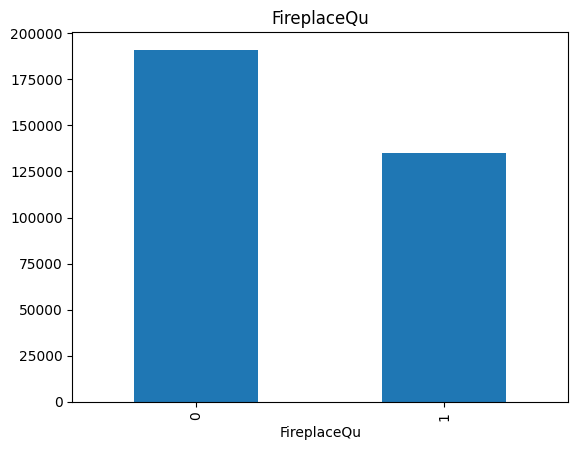

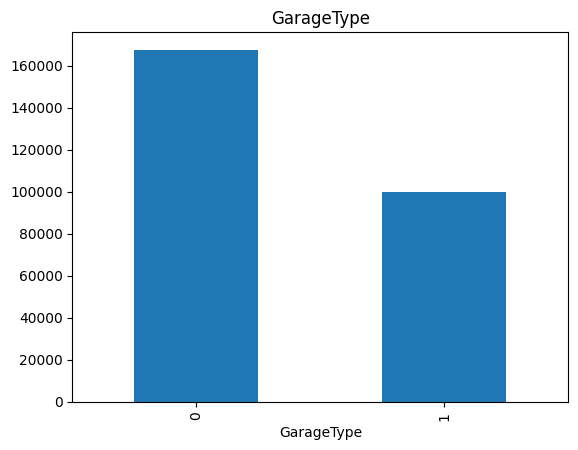

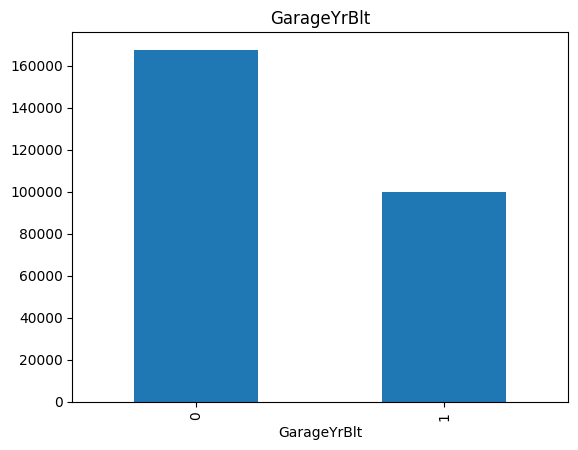

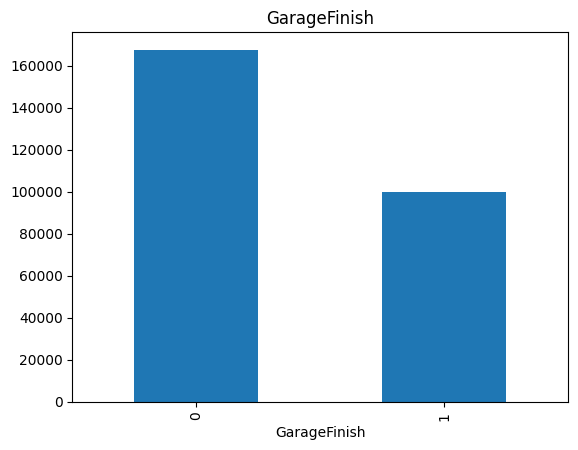

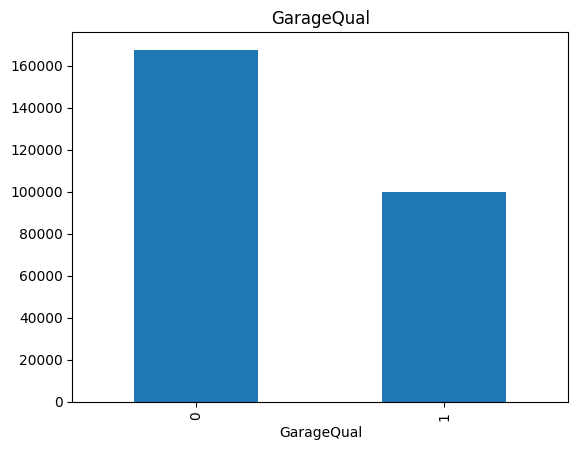

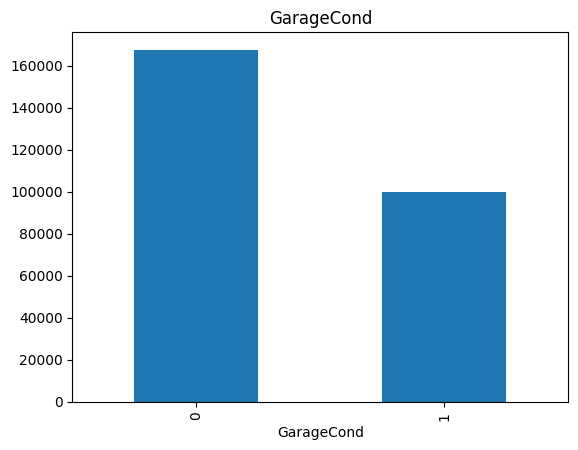

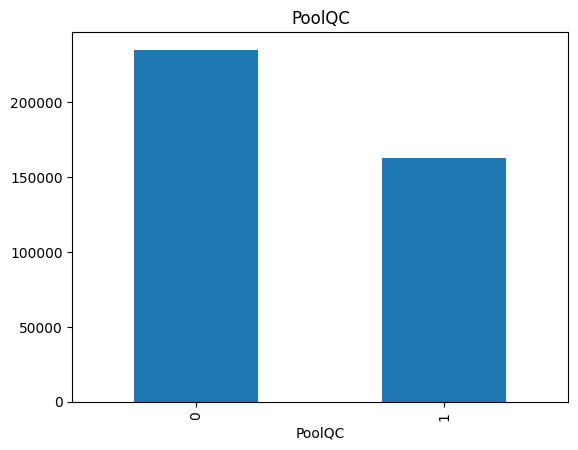

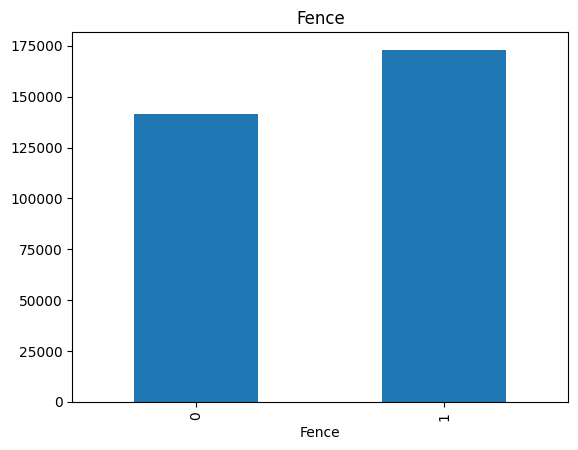

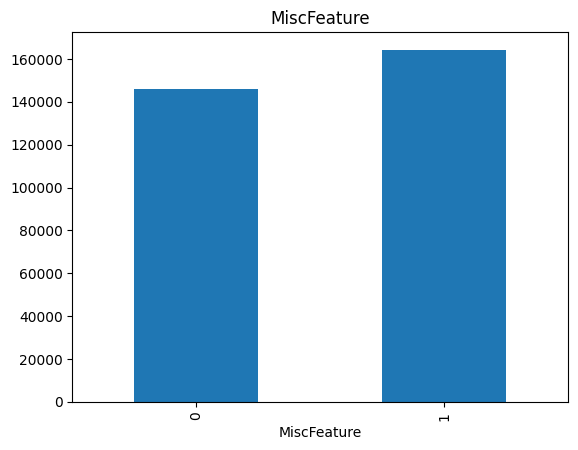

In [90]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With  the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [91]:
print("Id of Houses {}".format(len(dataset.Id)))

Id of Houses 1460


#**3.Handling Numerical Variables**

In [92]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables(Eg: Datetime Variables)
Defination:Examples of purely temporal variables are time and functions of time, dummies associated with time intervals and points in time, and measures of phenomena that vary over time or index temporal environments.

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.


In [93]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [94]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

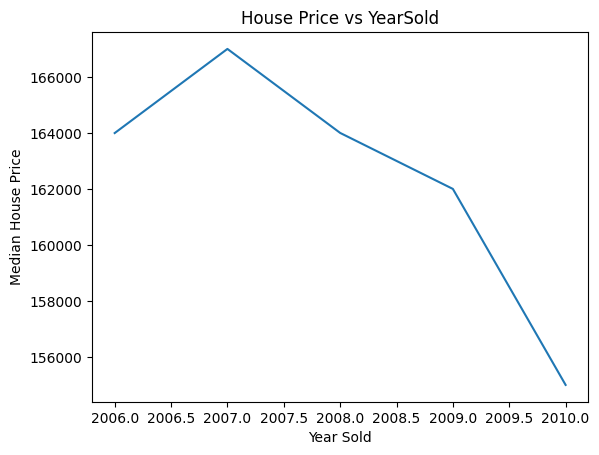

In [95]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



In [96]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

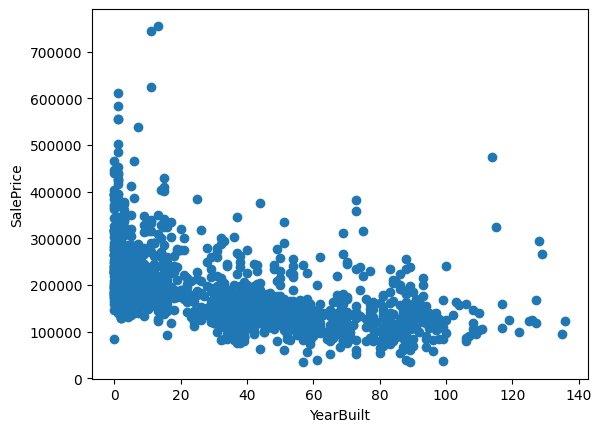

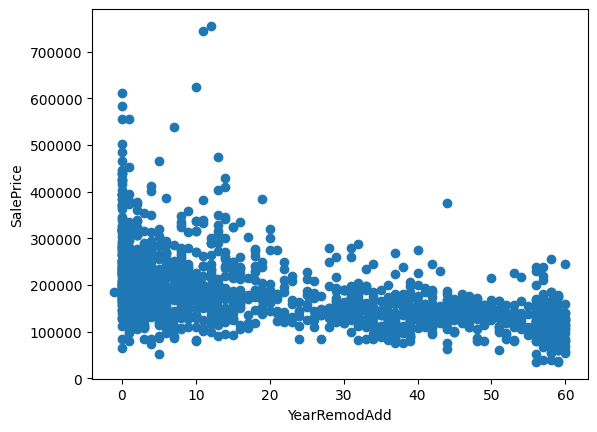

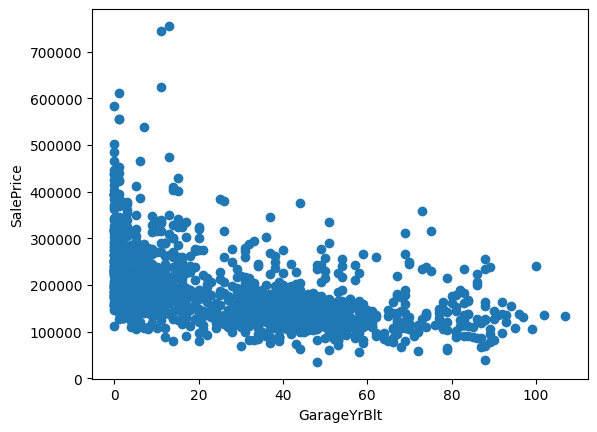

In [97]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':

        ## We will capture the difference between year variable and year the house was sold for (like total years of that particular house )
        dataset[feature]=dataset['YrSold']-dataset[feature] #if u don't consider this then it will give u wrong analysis

        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

    
    

In [98]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [99]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [100]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


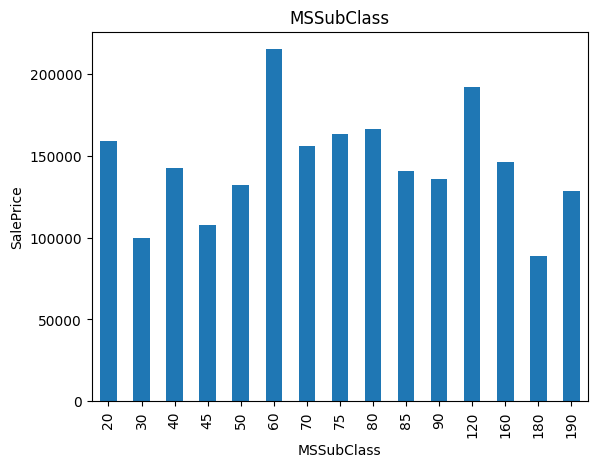

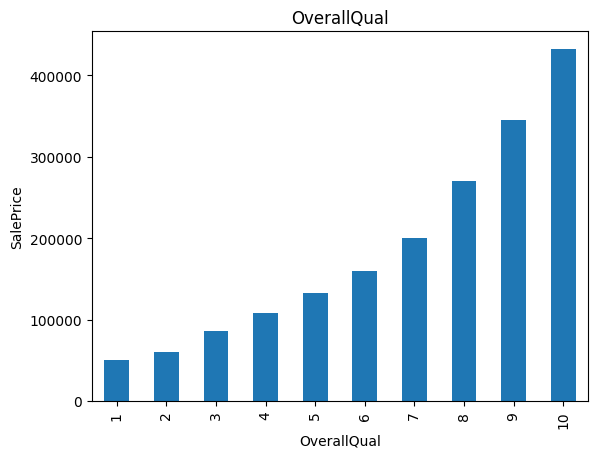

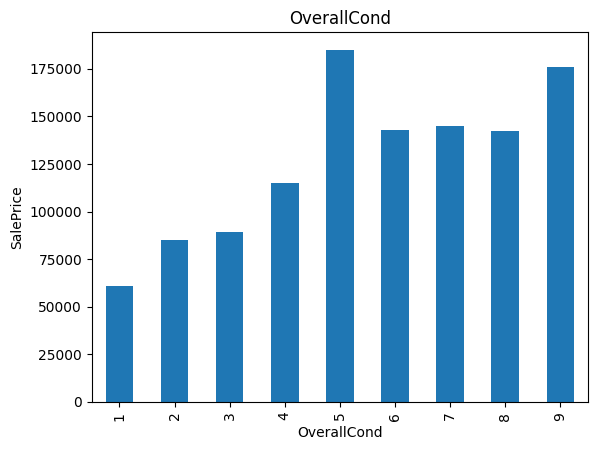

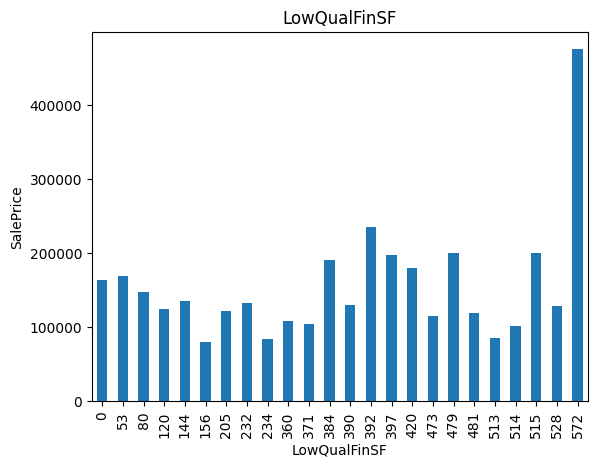

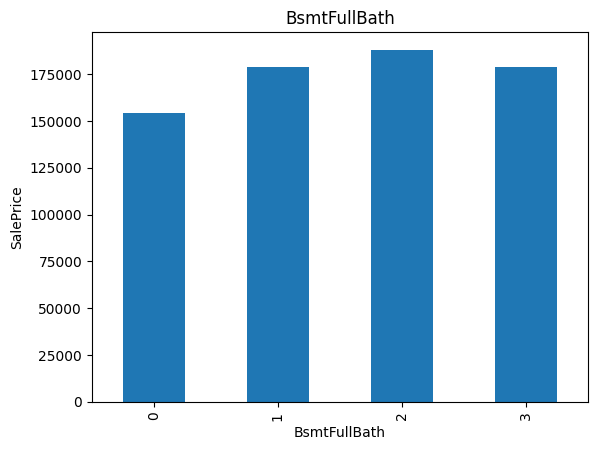

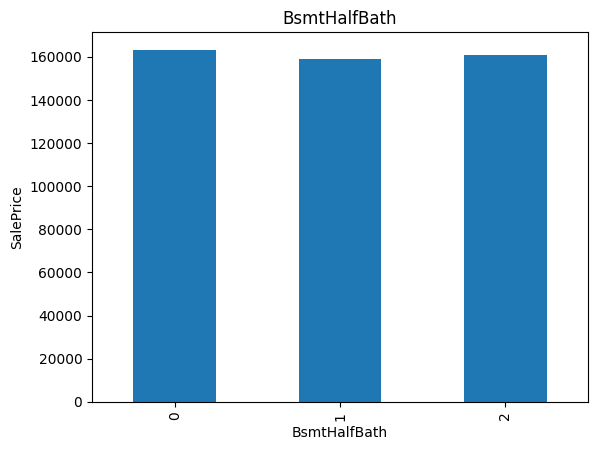

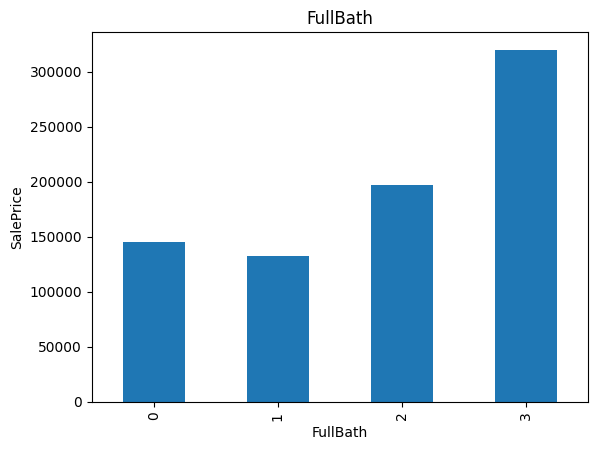

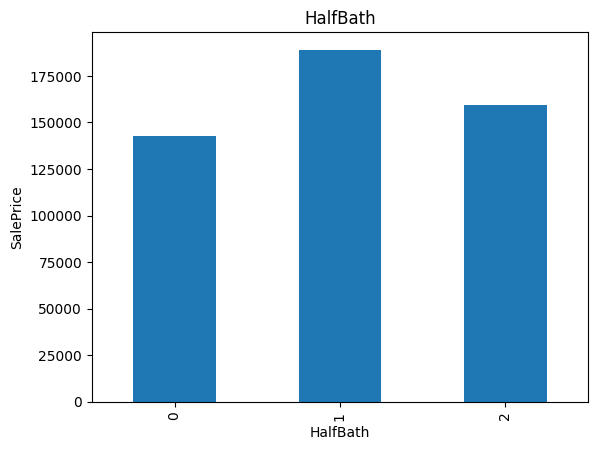

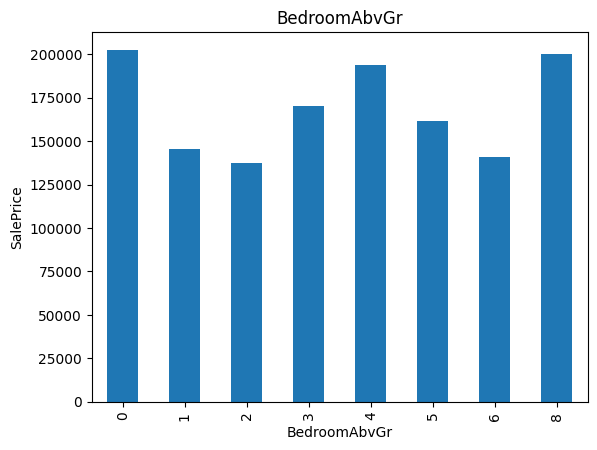

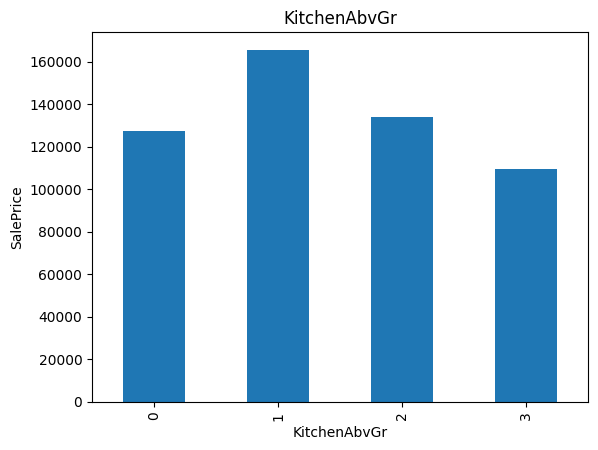

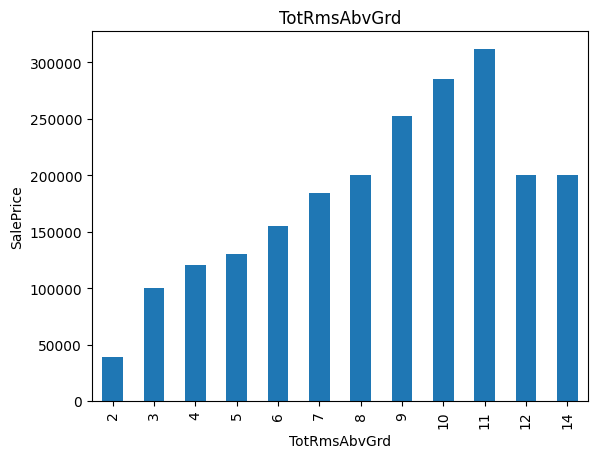

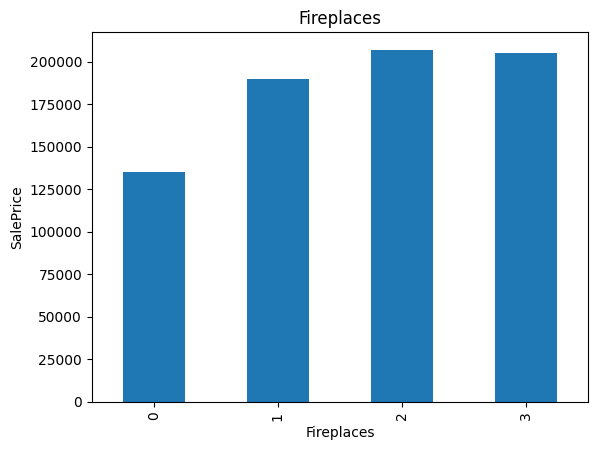

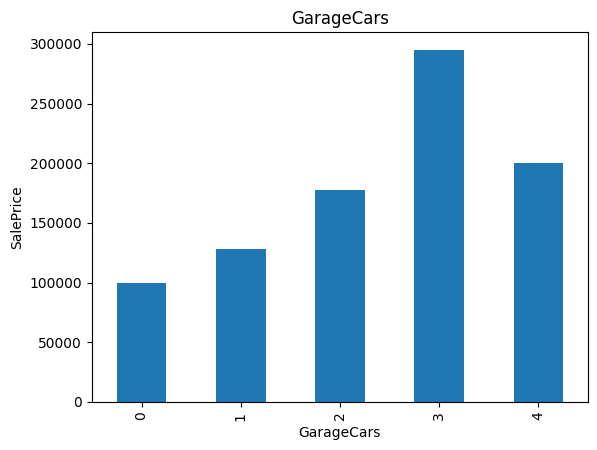

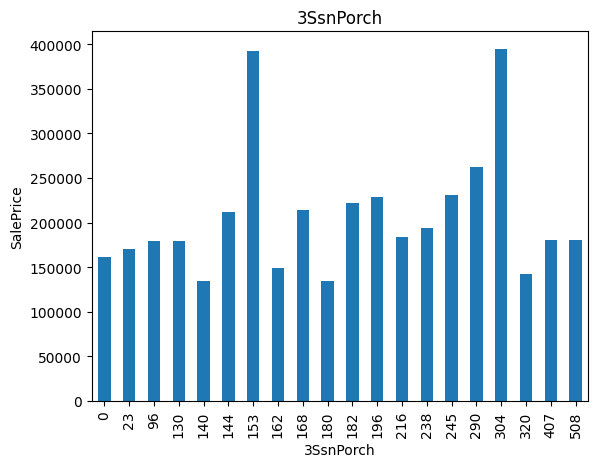

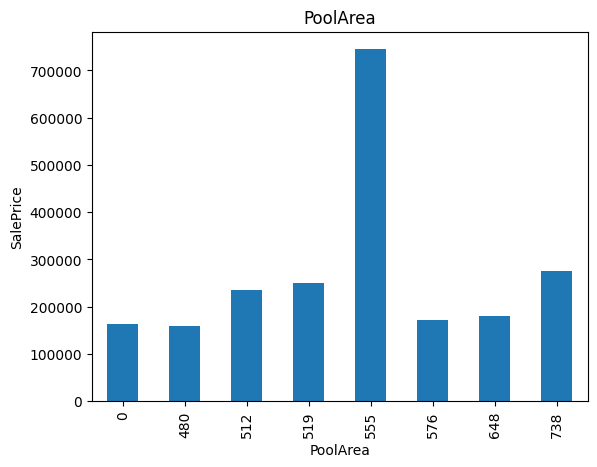

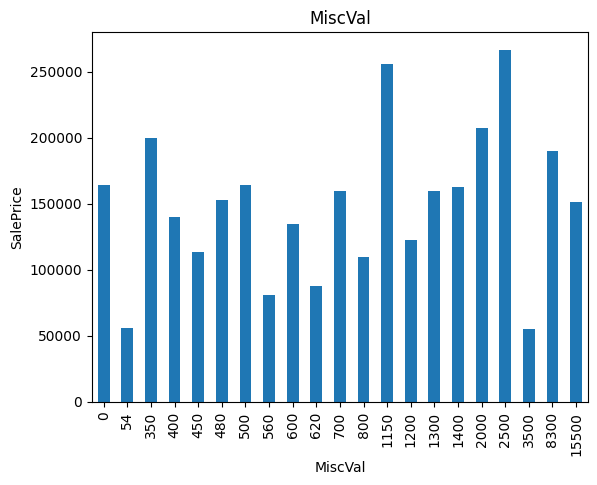

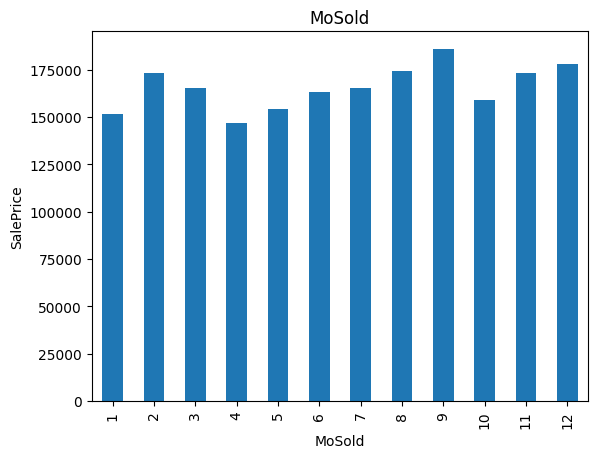

In [101]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [102]:
## There is a relationship between variable number and SalePrice

**Handling Continuous Variable**

In [103]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


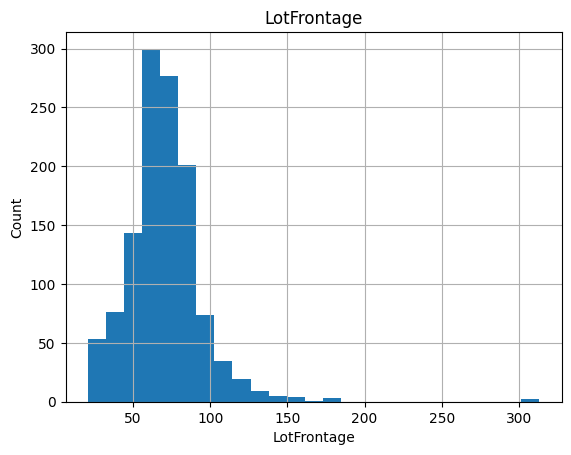

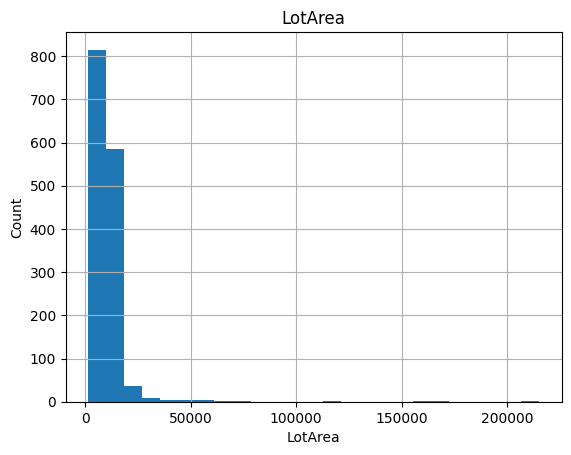

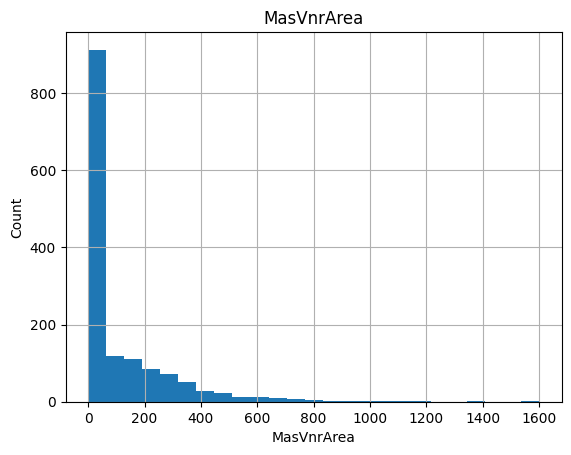

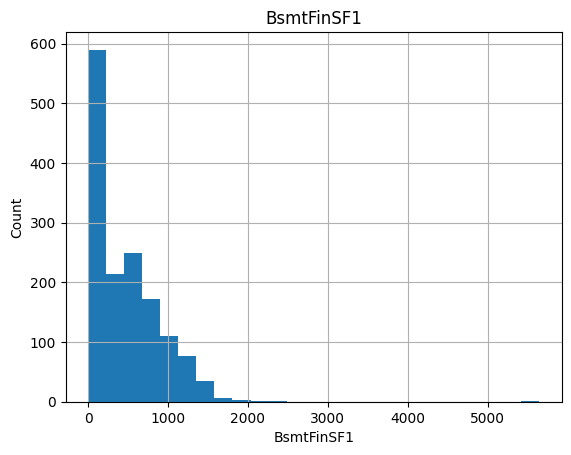

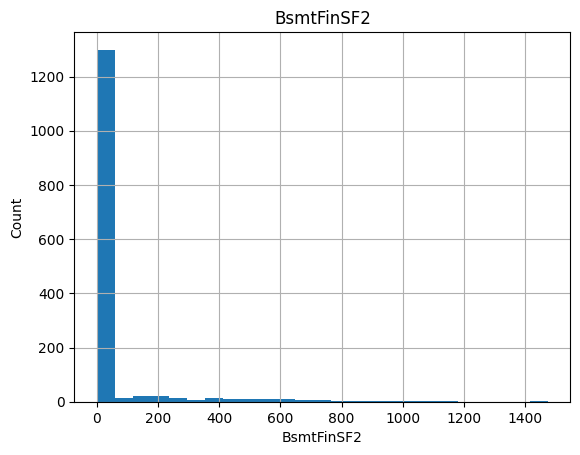

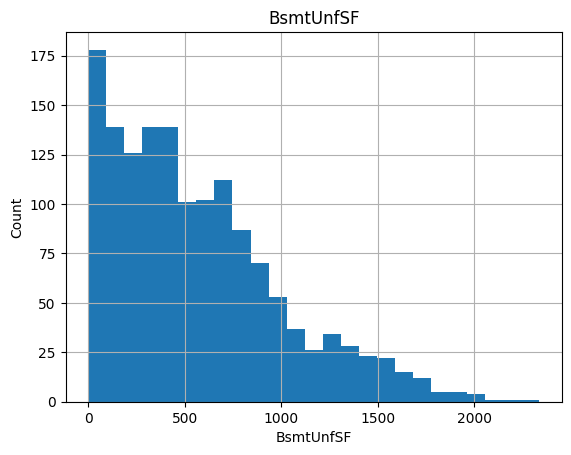

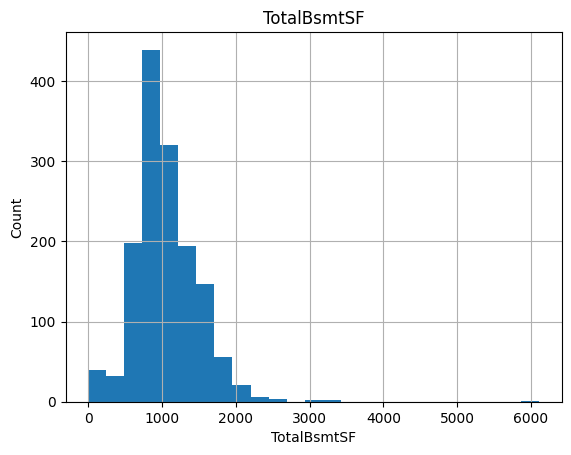

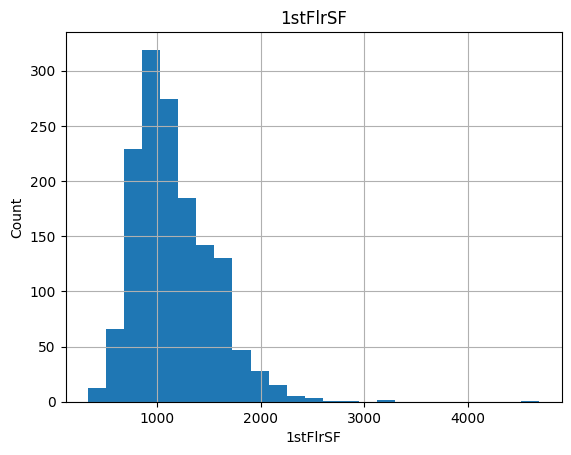

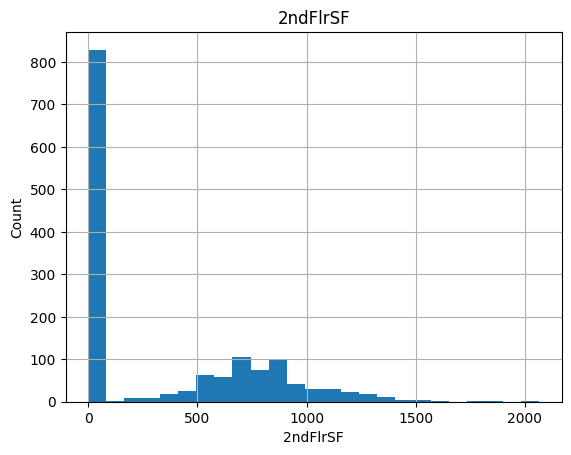

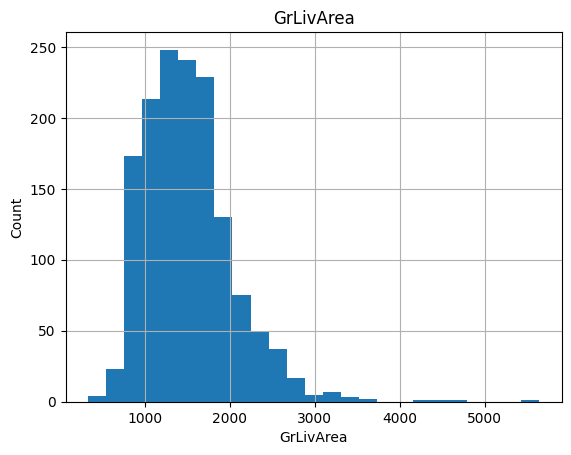

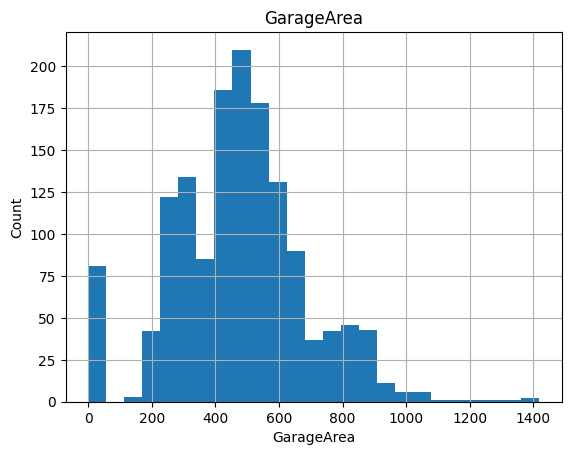

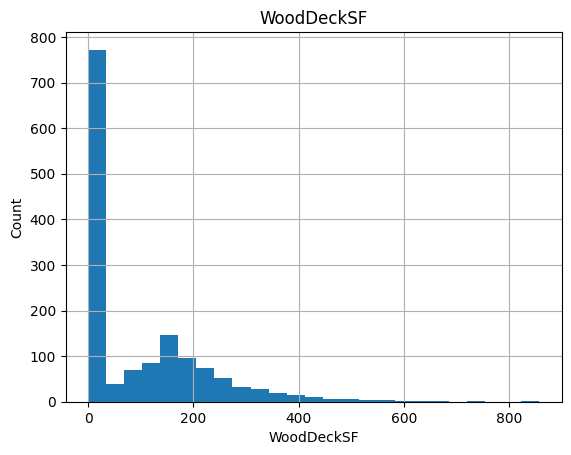

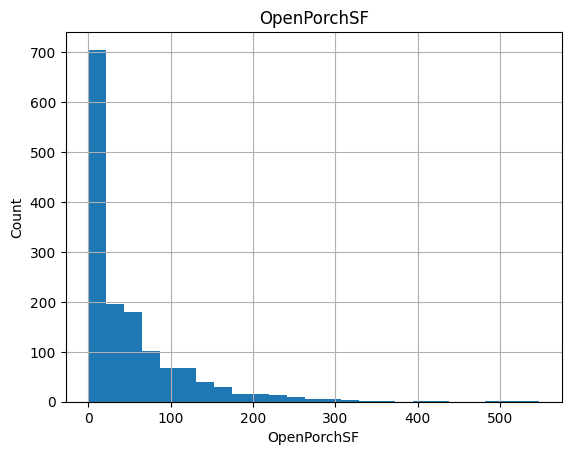

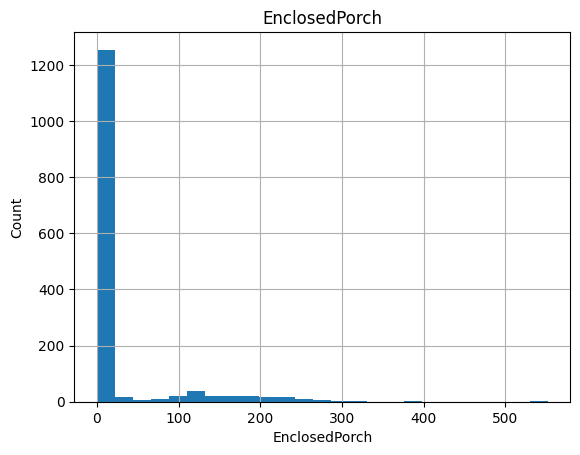

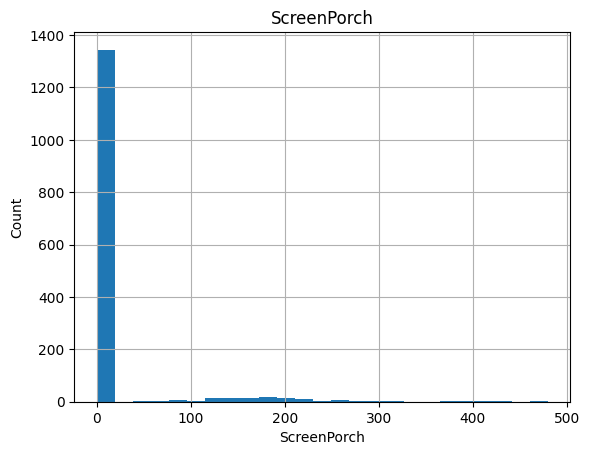

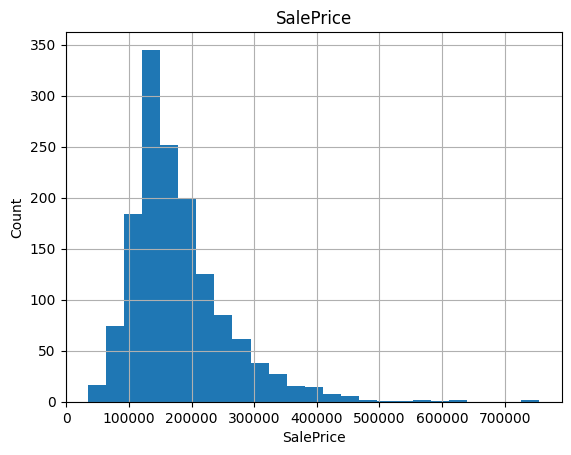

In [104]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


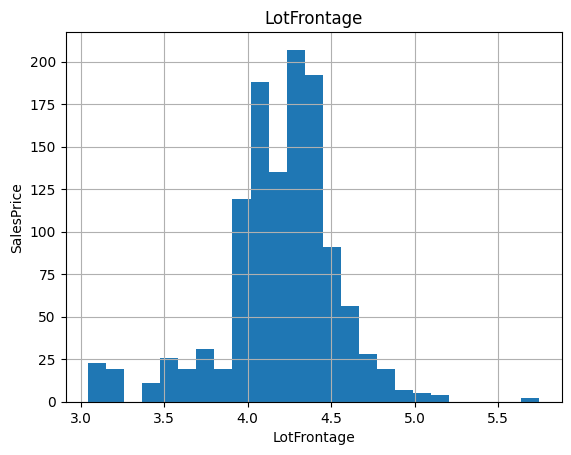

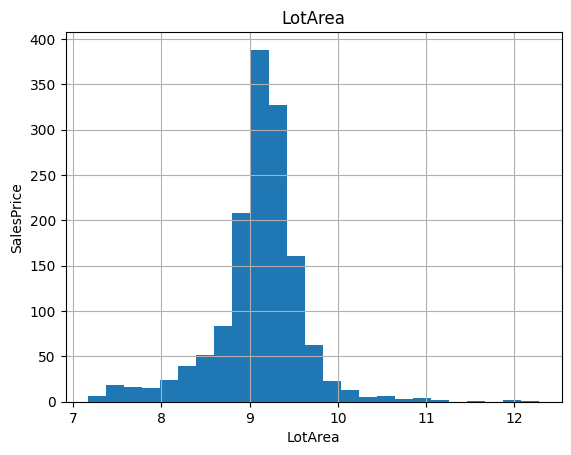

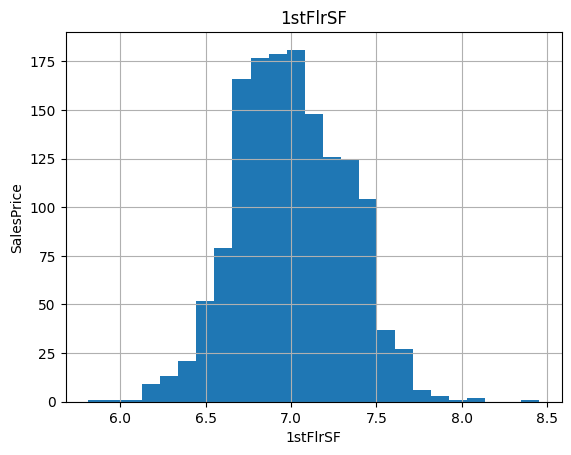

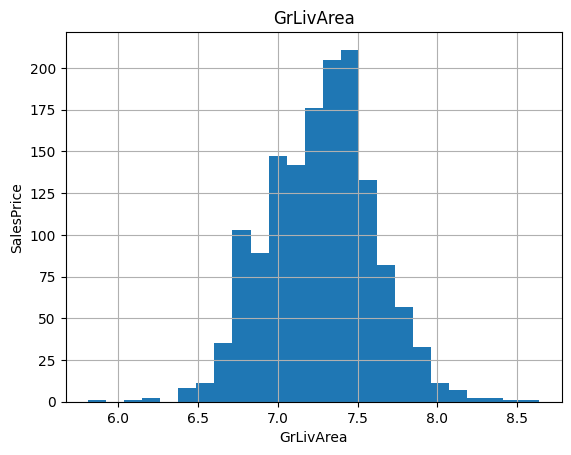

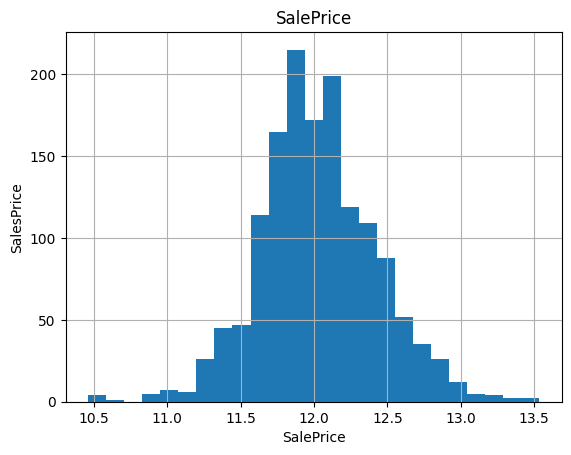

In [105]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    if 0 in dataset[feature].unique():  ##becuase log of zero is undefined as we are taking logarithm of the value 
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        # plt.scatter(data[feature],data['SalePrice'])
        dataset[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        
    

**Handling Outliers**

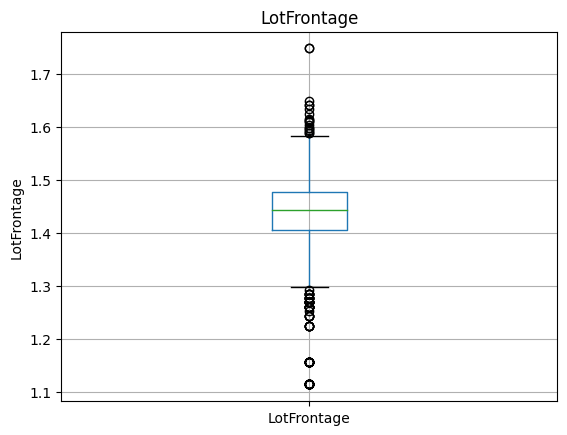

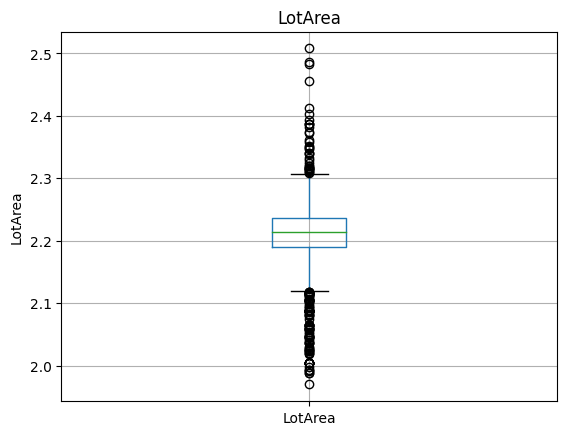

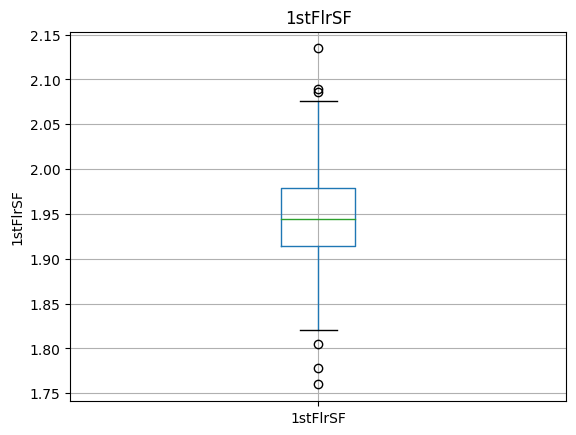

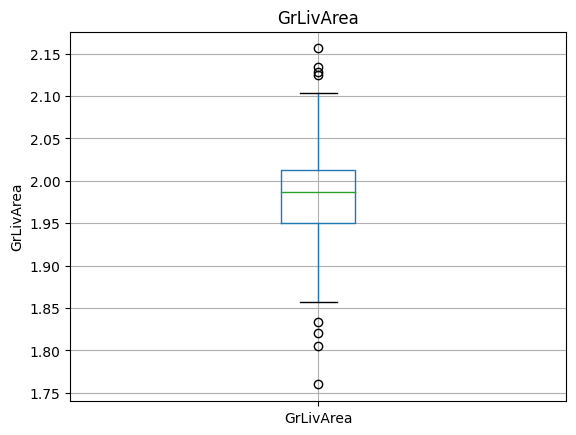

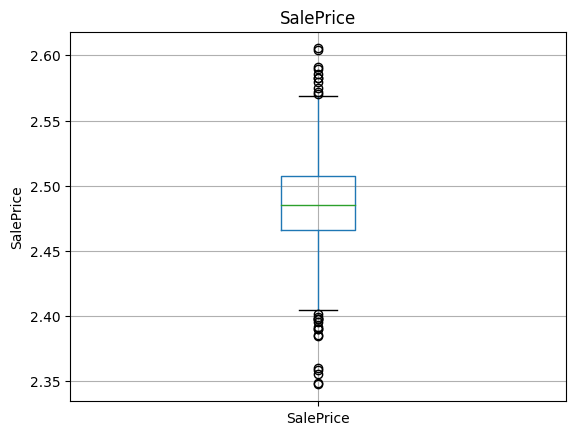

In [106]:
for feature in continuous_feature:
   
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

**Categorical Variables**

In [107]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

In [108]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal


In [109]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

In [110]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

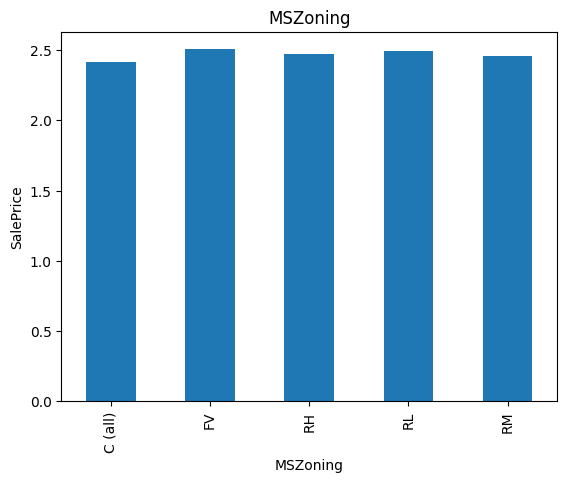

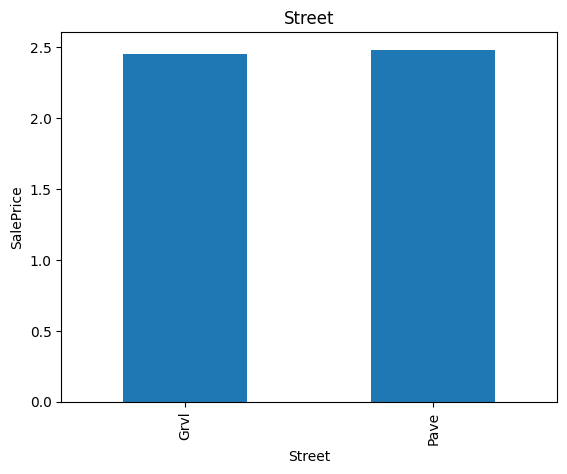

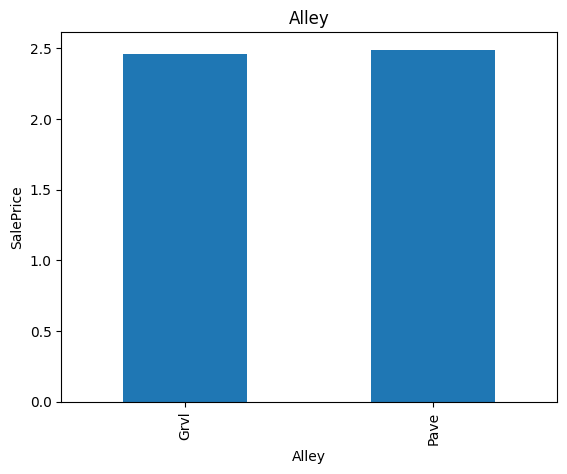

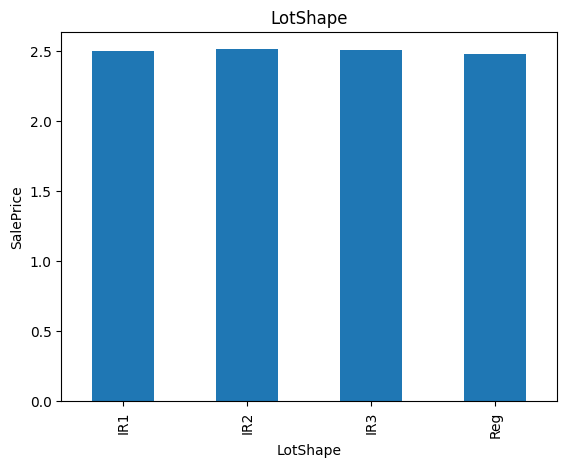

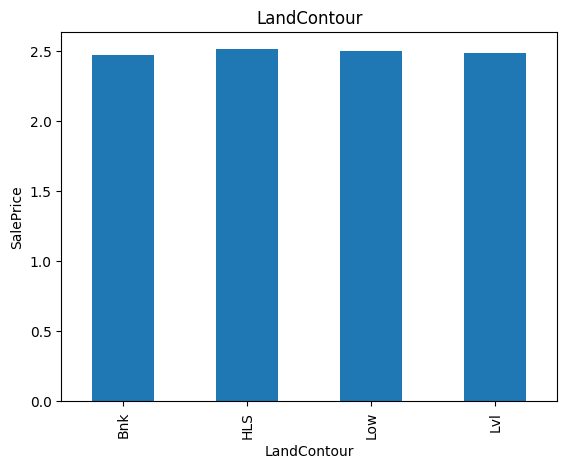

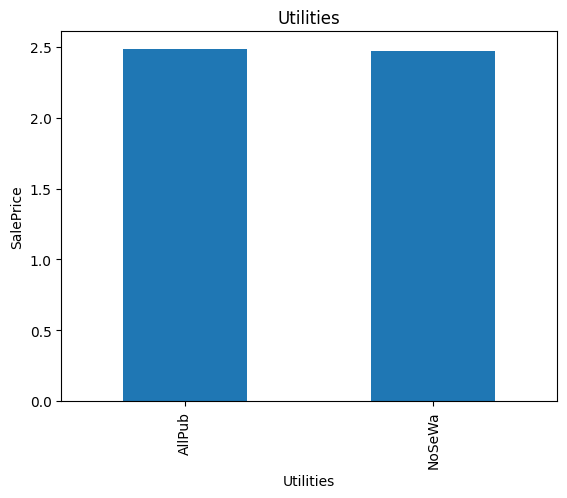

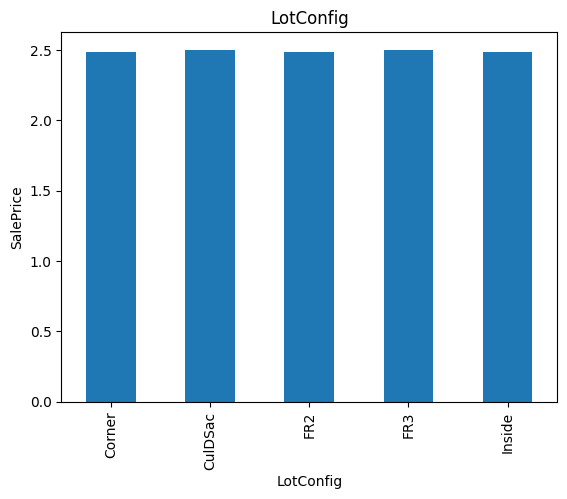

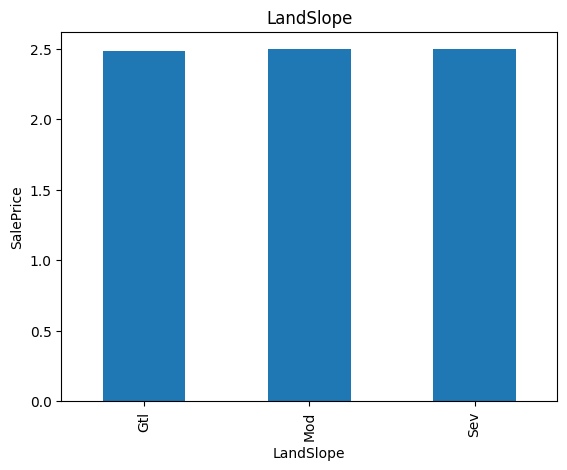

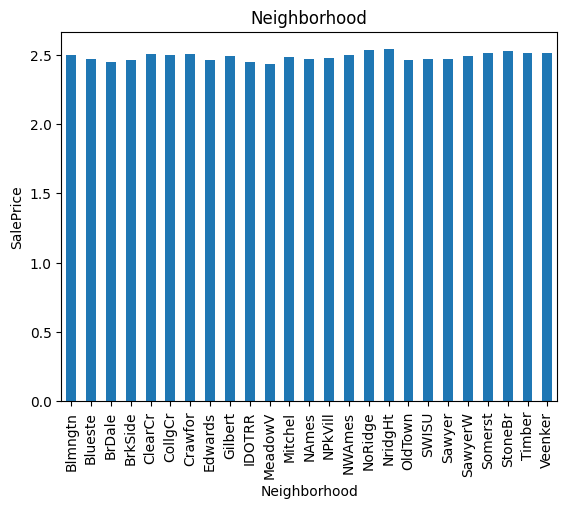

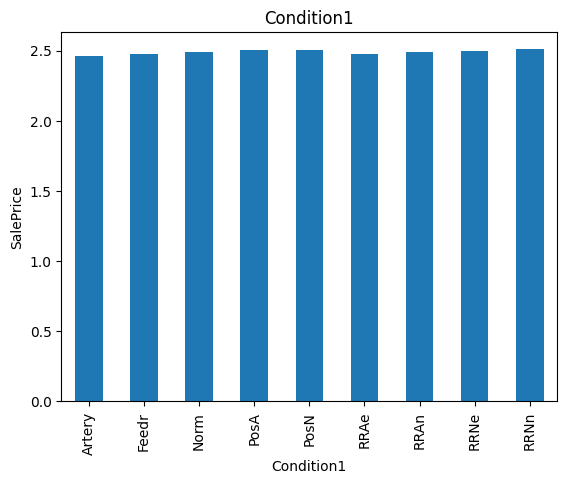

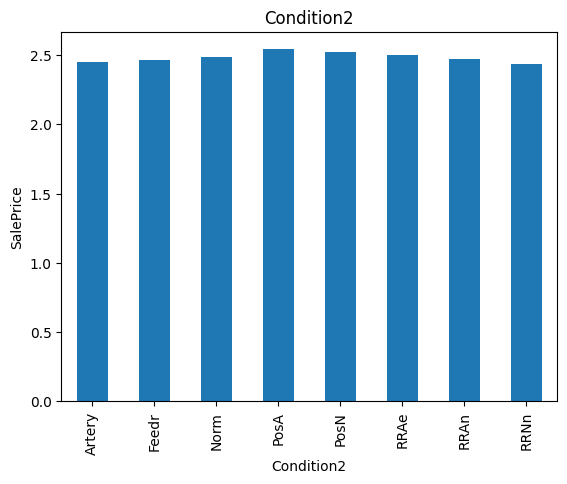

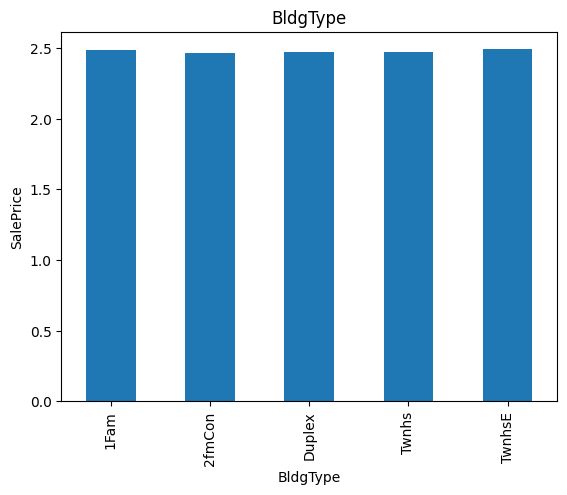

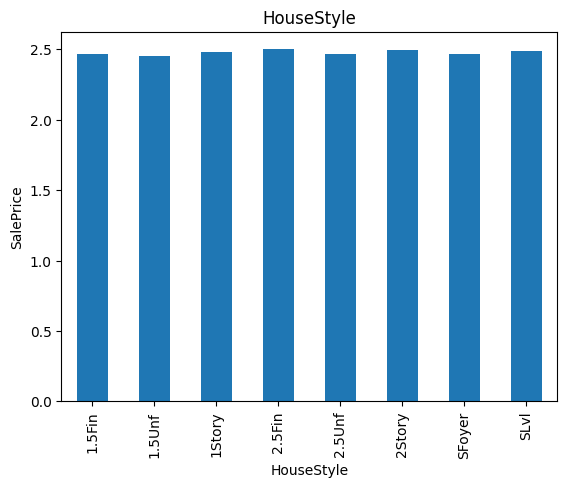

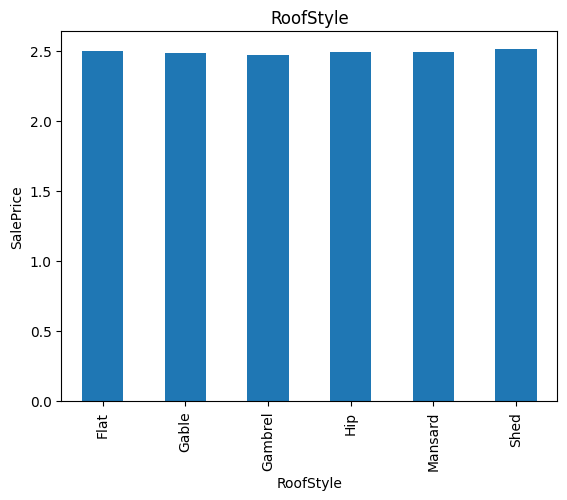

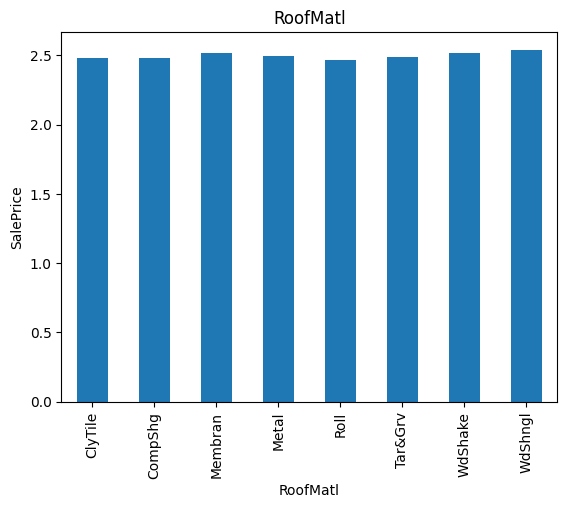

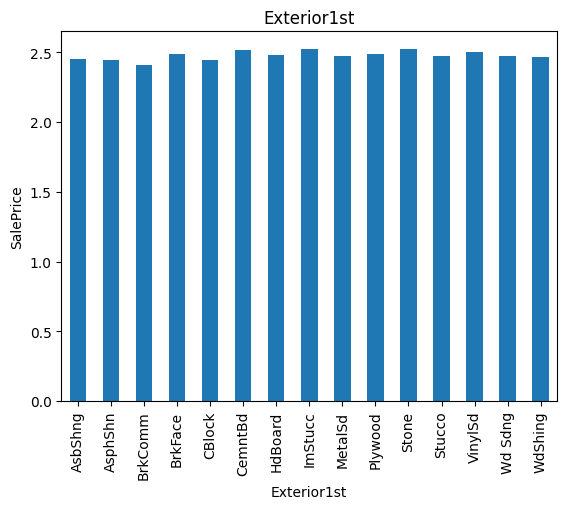

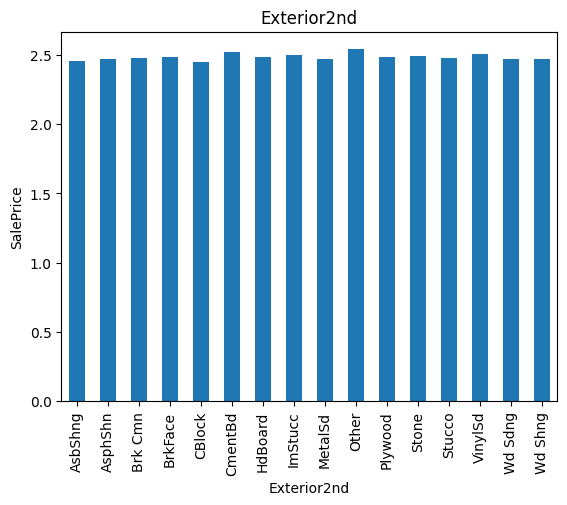

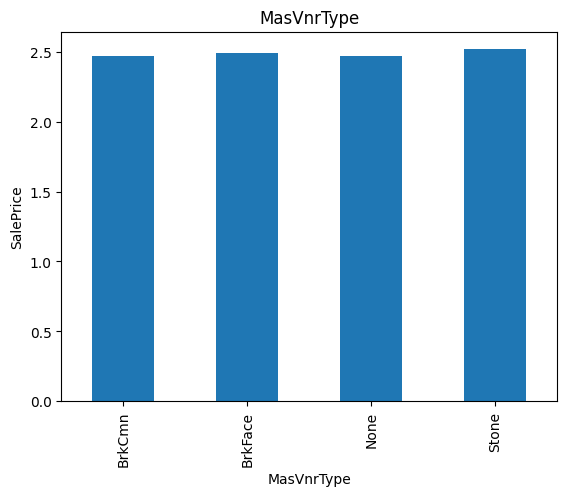

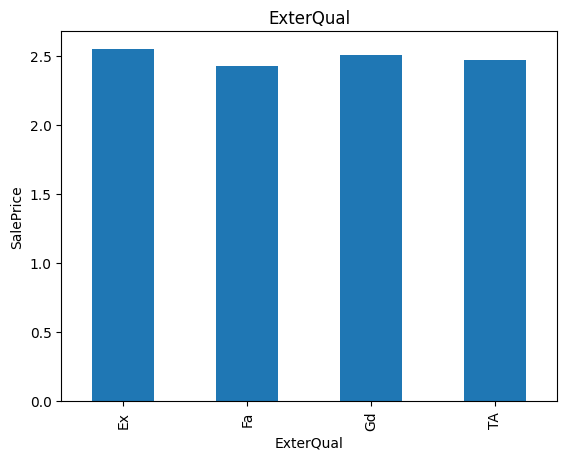

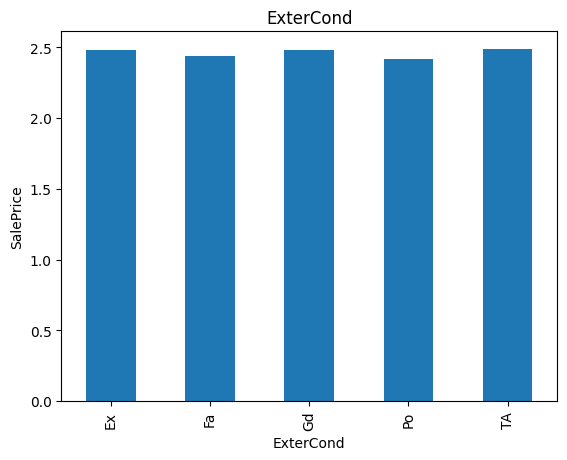

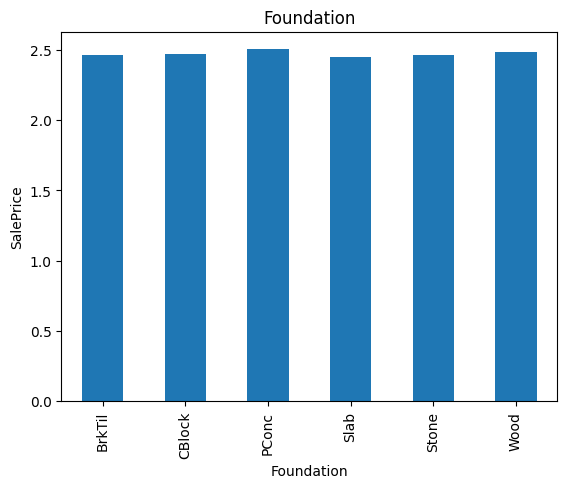

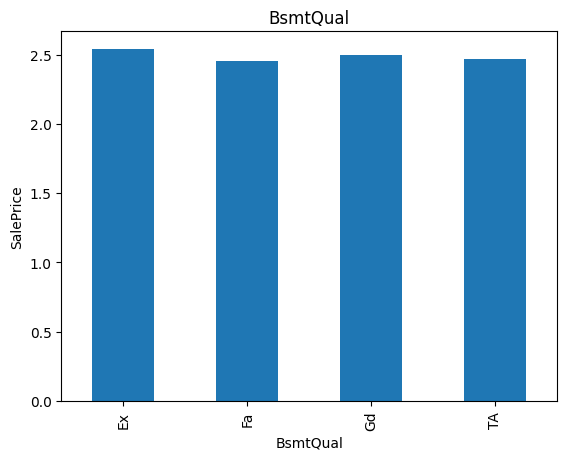

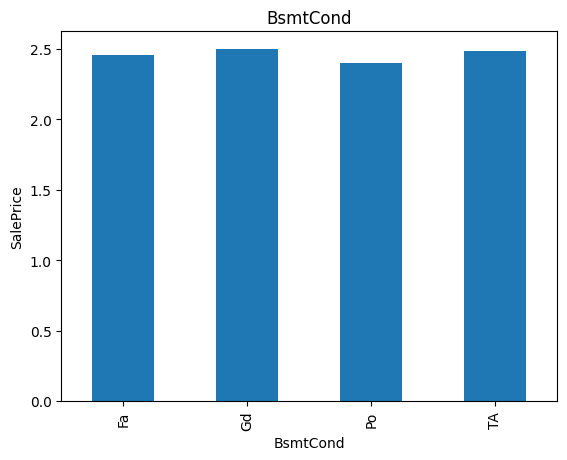

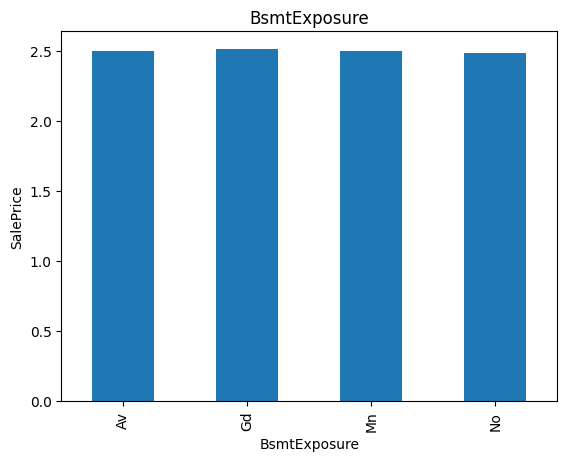

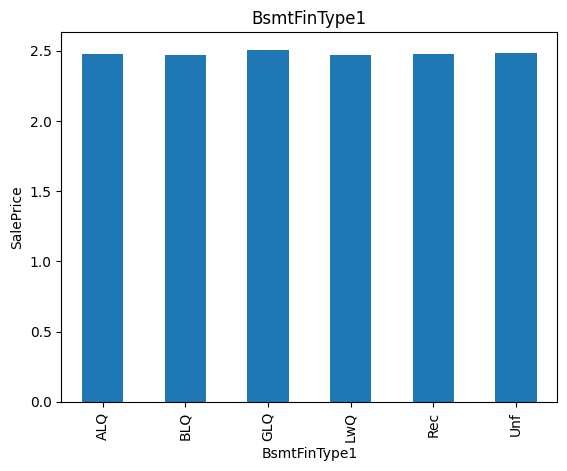

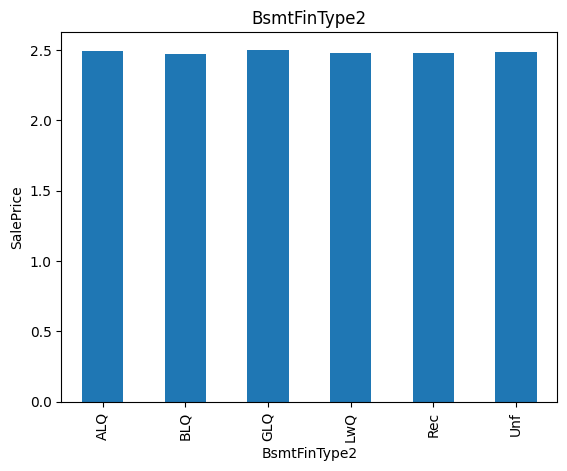

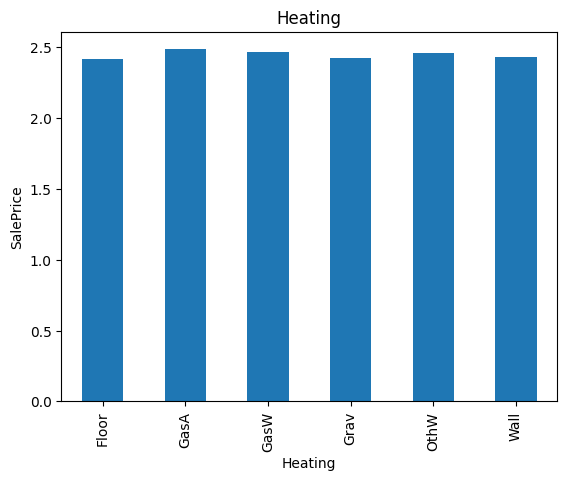

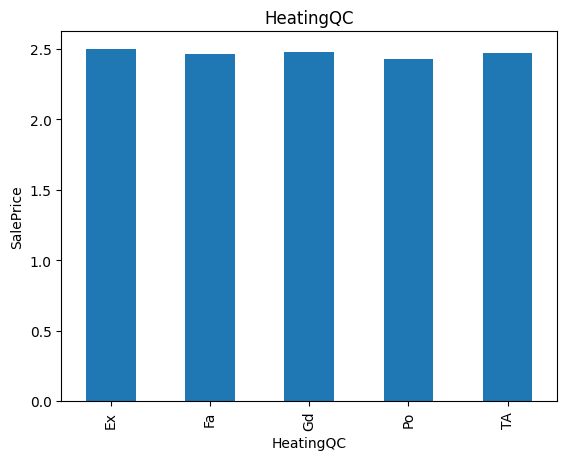

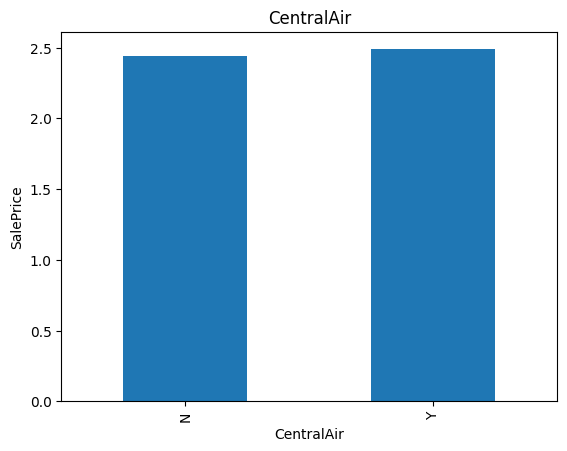

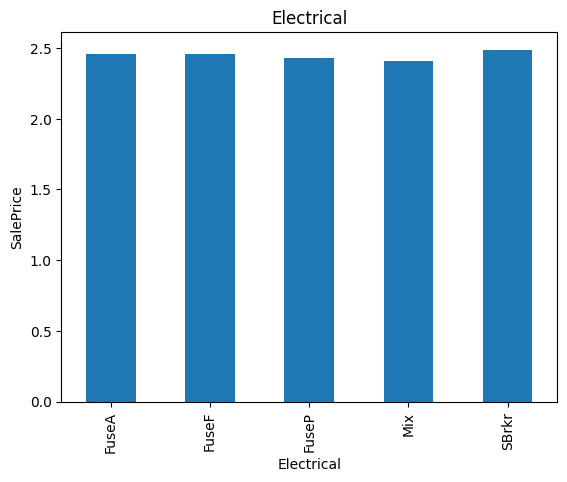

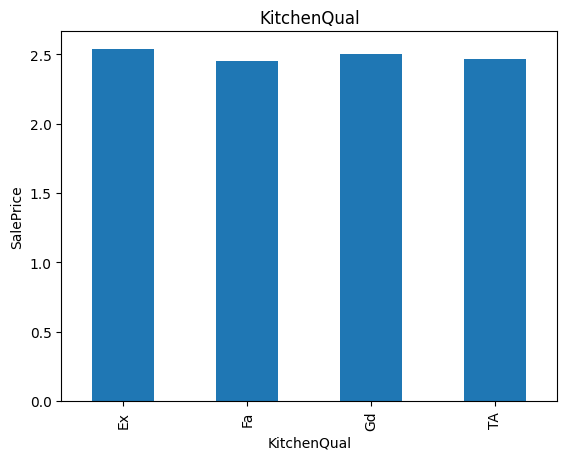

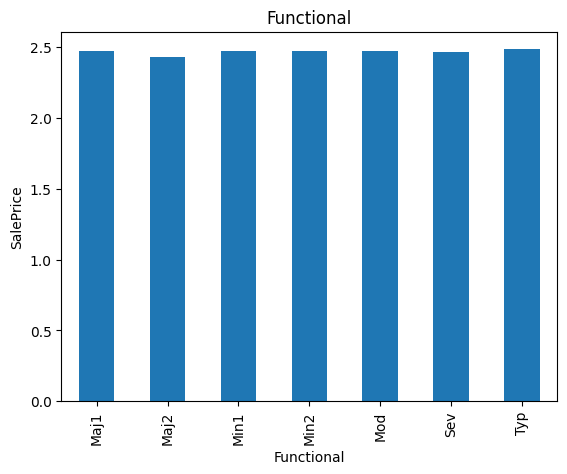

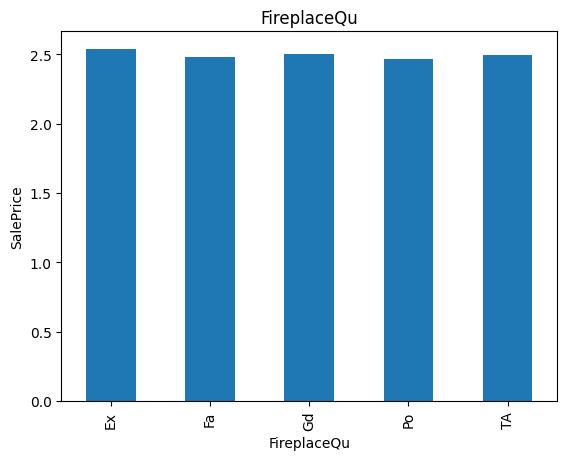

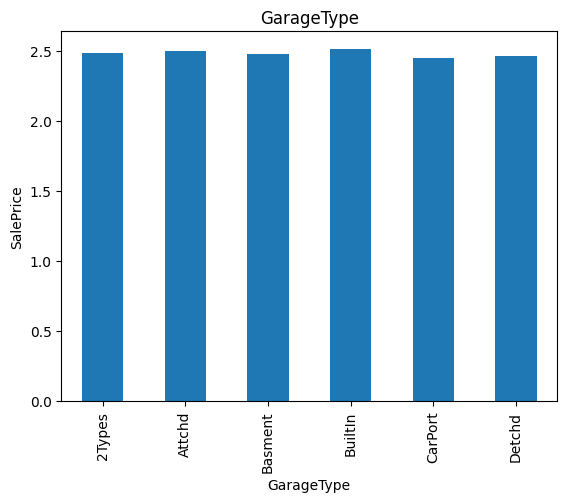

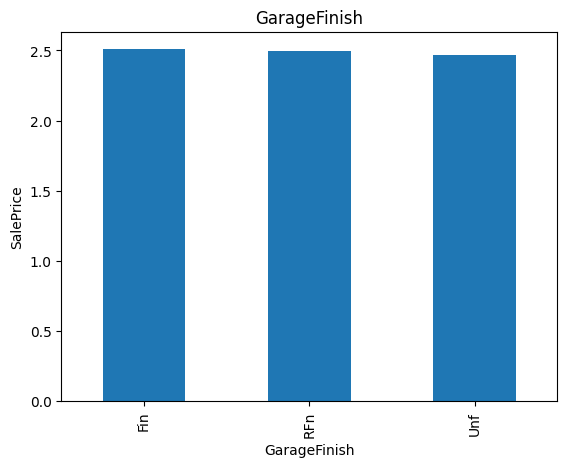

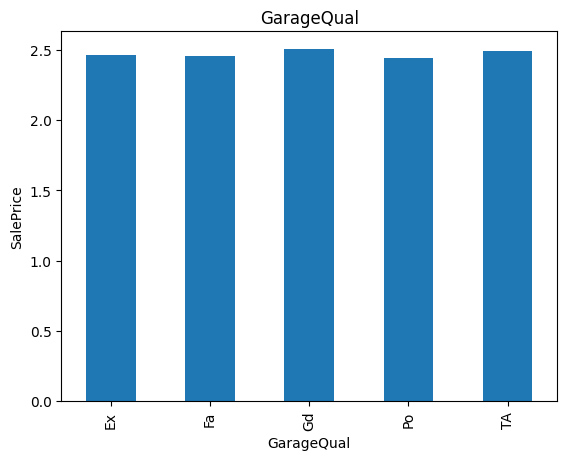

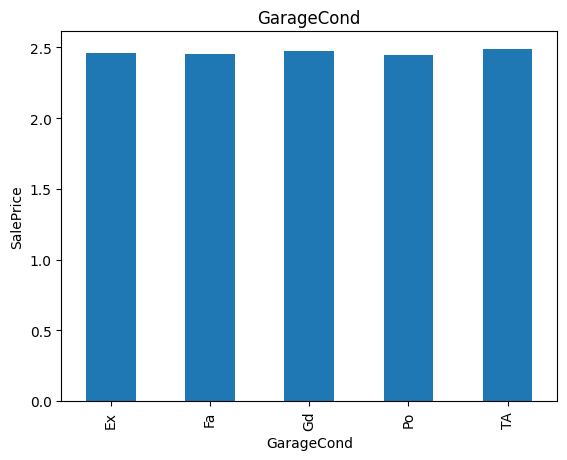

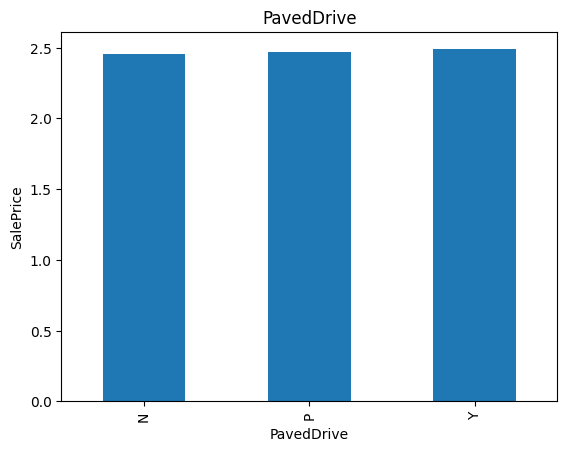

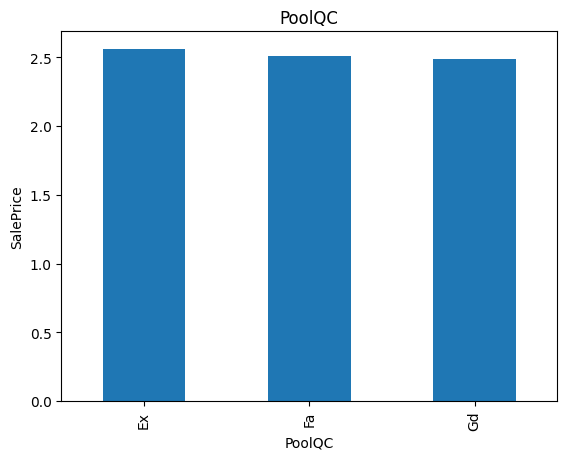

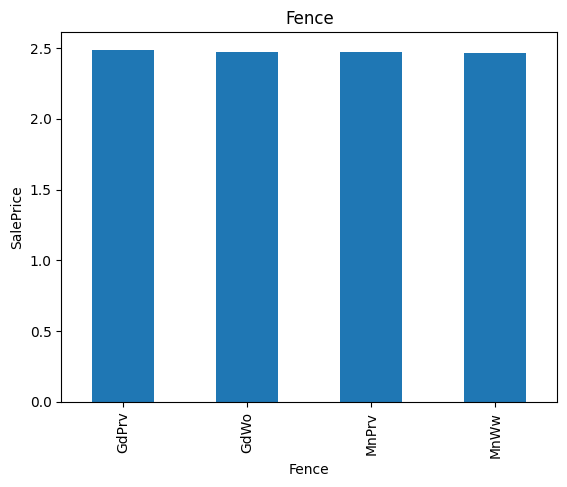

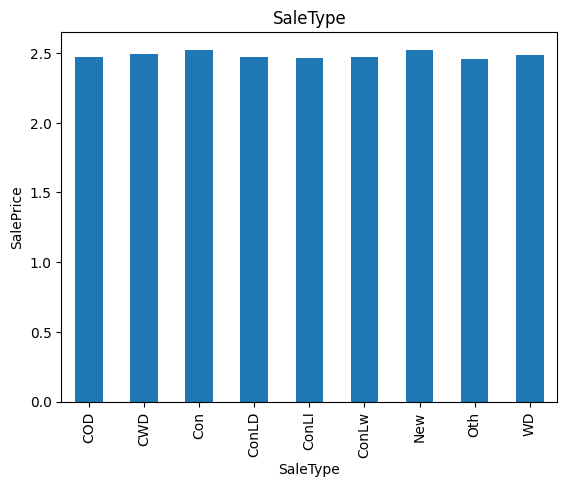

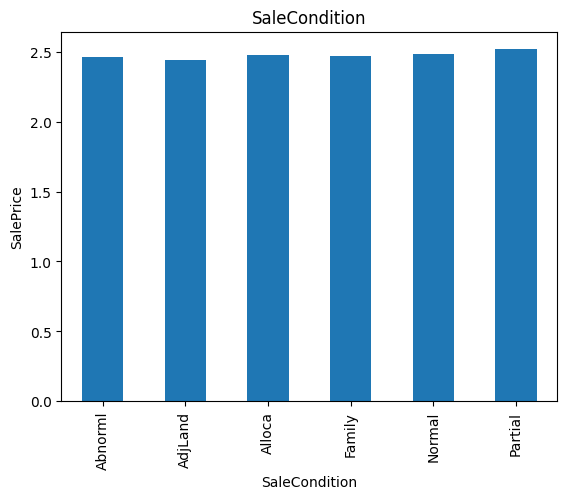

In [111]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [112]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,1.428968,2.201872,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,1.909879,854,0,2.007442,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.505338
1,2,20,RL,1.477511,2.215885,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1.965776,0,0,1.965776,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.493950
2,3,60,RL,1.439718,2.233034,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,1.920501,866,0,2.013266,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.510994
3,4,70,RL,1.409607,2.215315,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,1.926869,756,0,2.007990,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.472277
4,5,60,RL,1.488584,2.258133,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1.952057,1053,0,2.040610,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.520050


In [113]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] ##got from the analysis

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [114]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,0.356952,0.789308,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0.647040,854,0,0.696861,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0.918424
1,2,20,RL,0.390359,0.795652,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0.675887,0,0,0.675887,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0.913868
2,3,60,RL,0.364448,0.803361,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0.652586,866,0,0.699758,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,0.920679
3,4,70,RL,0.343311,0.795395,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,0.655897,756,0,0.697134,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0.905140
4,5,60,RL,0.397825,0.814538,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0.668884,1053,0,0.713249,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,0.924279


<Axes: >

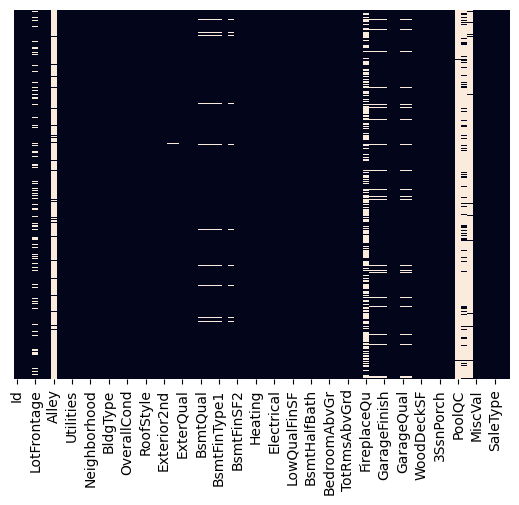

In [115]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)


In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [117]:
dataset['LotFrontage']=dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset.drop(['Alley'],axis=1,inplace=True)
dataset['BsmtCond']=dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtQual']=dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
dataset['FireplaceQu']=dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['GarageType']=dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
dataset.drop(['GarageYrBlt'],axis=1,inplace=True)
dataset['GarageFinish']=dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageQual']=dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
dataset['GarageCond']=dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])
dataset.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
dataset['BsmtExposure']=dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
dataset['BsmtFinType2']=dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
dataset['MasVnrType']=dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])

<Axes: >

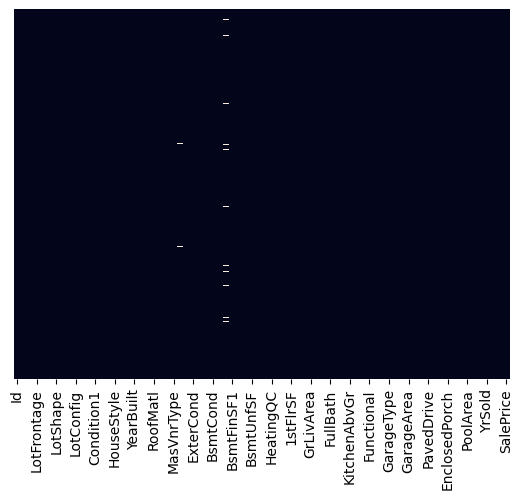

In [118]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)


In [119]:
null_counts = dataset.isnull().sum().sort_values(ascending=False)
null_columns = null_counts[null_counts > 0]
print(null_columns)

BsmtFinType1    37
MasVnrArea       8
Electrical       1
dtype: int64


In [120]:
dataset['BsmtFinType1']=dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['Electrical']=dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

<Axes: >

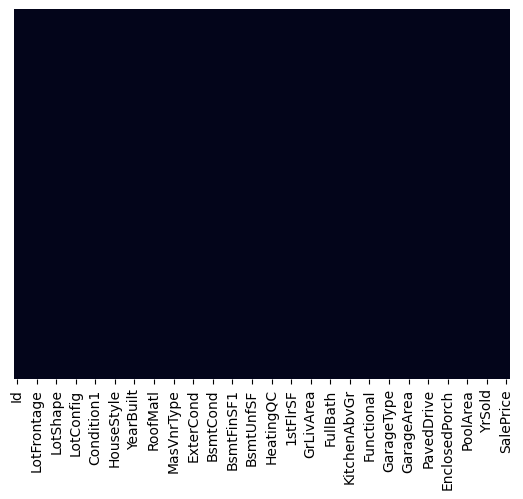

In [121]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)


In [122]:
dataset.shape

(1460, 76)

#**4.Applying all the steps for test data**

In [123]:
test_df=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

In [124]:
test_df.shape

(1459, 80)

MSZoning 0.0027  % missing values
LotFrontage 0.1556  % missing values
Alley 0.9267  % missing values
Utilities 0.0014  % missing values
MasVnrType 0.011  % missing values
MasVnrArea 0.0103  % missing values
BsmtQual 0.0302  % missing values
BsmtCond 0.0308  % missing values
BsmtExposure 0.0302  % missing values
BsmtFinType1 0.0288  % missing values
BsmtFinType2 0.0288  % missing values
BsmtFullBath 0.0014  % missing values
BsmtHalfBath 0.0014  % missing values
Functional 0.0014  % missing values
FireplaceQu 0.5003  % missing values
GarageType 0.0521  % missing values
GarageYrBlt 0.0535  % missing values
GarageFinish 0.0535  % missing values
GarageQual 0.0535  % missing values
GarageCond 0.0535  % missing values
PoolQC 0.9979  % missing values
Fence 0.8012  % missing values
MiscFeature 0.965  % missing values
Number of numerical variables:  37
Continuous feature Count 15


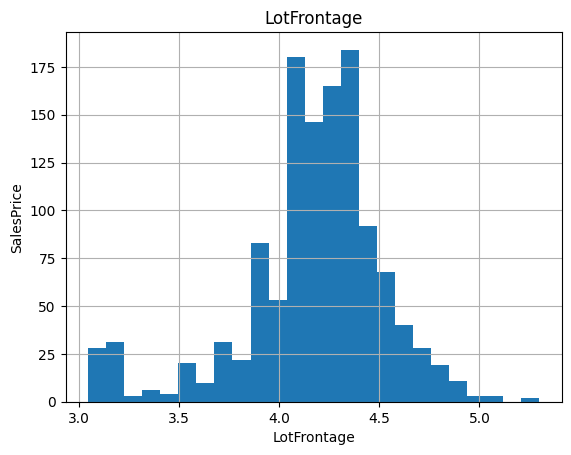

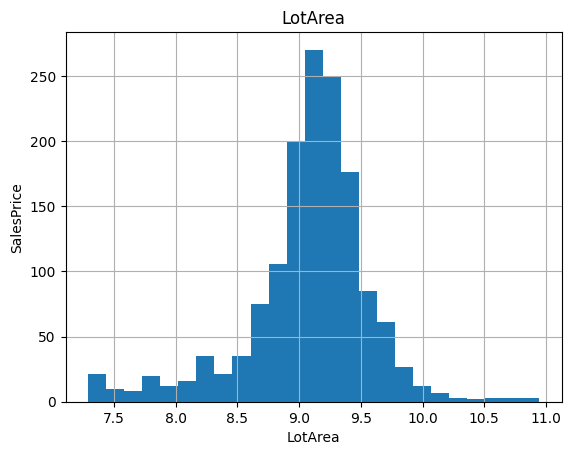

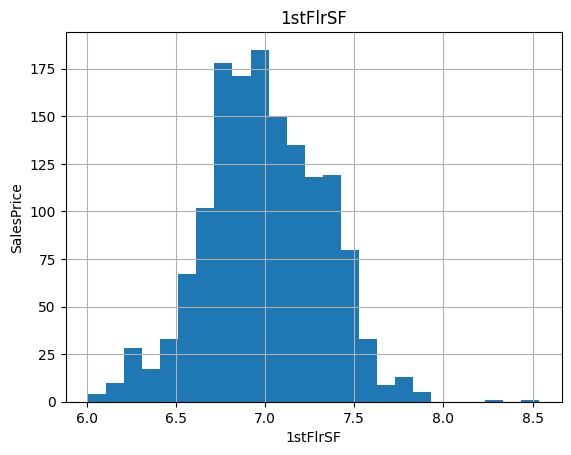

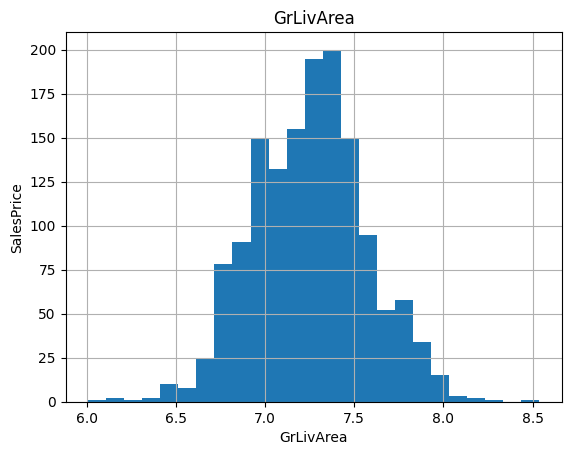

Discrete Variables Count: 16


In [125]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in test_df.columns if test_df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(test_df[feature].isnull().mean(), 4),  ' % missing values')
    


for feature in year_feature:
    if feature!='YrSold':

        ## We will capture the difference between year variable and year the house was sold for (like total years of that particular house )
        test_df[feature]=test_df['YrSold']-test_df[feature] #if u don't consider this then it will give u wrong analysis

  

# list of numerical variables
numerical_features = [feature for feature in test_df.columns if test_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
test_df[numerical_features].head()

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

for feature in continuous_feature:
    
    if 0 in test_df[feature].unique():  ##becuase log of zero is undefined as we are taking logarithm of the value 
        pass
    else:
        test_df[feature]=np.log(test_df[feature])
        # plt.scatter(data[feature],data['SalePrice'])
        test_df[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()



discrete_feature=[feature for feature in numerical_features if len(test_df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea'] ##got from the analysis

for feature in num_features:
    test_df[feature]=np.log(test_df[feature])

In [126]:
test_df.head()
test_df.shape

(1459, 80)

<Axes: >

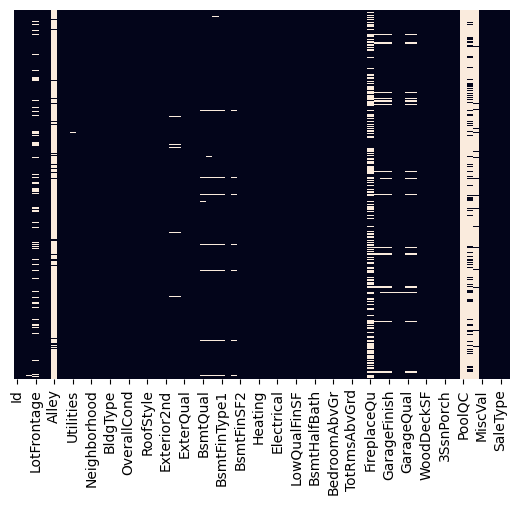

In [127]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)


In [128]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df.drop(['Alley'],axis=1,inplace=True)
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['Electrical']=test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

<Axes: >

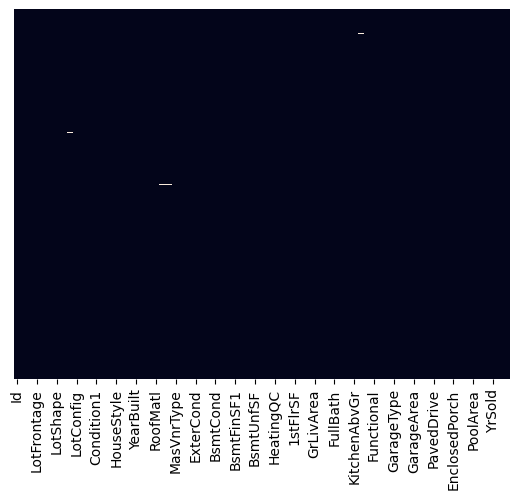

In [129]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)


In [130]:
null_counts = test_df.isnull().sum().sort_values(ascending=False)
null_columns = null_counts[null_counts > 0]
print(null_columns)

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
Utilities       2
Exterior1st     1
KitchenQual     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
TotalBsmtSF     1
BsmtFinSF2      1
BsmtUnfSF       1
SaleType        1
Exterior2nd     1
dtype: int64


In [131]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [132]:
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())

test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())

test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())

test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])



<Axes: >

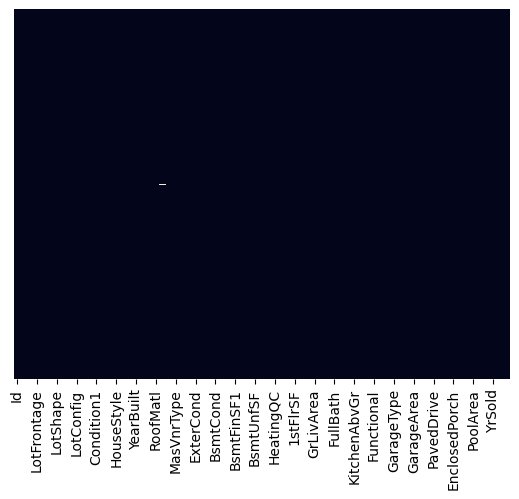

In [133]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [134]:
null_counts = test_df.isnull().sum().sort_values(ascending=False)
null_columns = null_counts[null_counts > 0]
print(null_columns)

Exterior1st    1
GarageArea     1
dtype: int64


In [135]:
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mode()[0])

In [136]:
test_df.shape

(1459, 75)

Comnbining test and train dataset 

In [137]:
main_df=dataset
test_data=test_df
final_df=pd.concat([dataset,test_df],axis=0)


In [138]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,0.356952,0.789308,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,0.647040,854,0,0.696861,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,0.918424
1,2,20,RL,0.390359,0.795652,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0.675887,0,0,0.675887,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,0.913868
2,3,60,RL,0.364448,0.803361,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,0.652586,866,0,0.699758,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,0.920679
3,4,70,RL,0.343311,0.795395,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,0.655897,756,0,0.697134,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,0.905140
4,5,60,RL,0.397825,0.814538,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,0.668884,1053,0,0.713249,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,0.924279


In [139]:
final_df['SalePrice'].isnull().sum()

1459

In [140]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [141]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [142]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [143]:
final_df.shape

(2919, 237)

In [144]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [145]:
final_df.shape


(2919, 177)

In [146]:
final_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,0.356952,0.789308,7,5,5,5,196.0,706.0,0.0,150.0,856.0,0.647040,854,0,0.696861,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0.918424,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,20,0.390359,0.795652,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,0.675887,0,0,0.675887,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,0.913868,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,60,0.364448,0.803361,7,5,7,6,162.0,486.0,0.0,434.0,920.0,0.652586,866,0,0.699758,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,0.920679,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,70,0.343311,0.795395,7,5,91,36,0.0,216.0,0.0,540.0,756.0,0.655897,756,0,0.697134,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,0.905140,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,5,60,0.397825,0.814538,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,0.668884,1053,0,0.713249,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,0.924279,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [157]:
df_Train=final_df.iloc[:1460,:] ########
df_Test=final_df.iloc[1460:,:]
data=df_Train
data.to_csv("Train_dataset.csv")

In [148]:
df_Train.isnull().sum()

Id             0
MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
              ..
BuiltIn        0
CarPort        0
Detchd         0
RFn            0
P              0
Length: 177, dtype: int64

In [149]:
df_Test.isnull().sum()

Id             0
MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
              ..
BuiltIn        0
CarPort        0
Detchd         0
RFn            0
P              0
Length: 177, dtype: int64

In [150]:
df_Train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,0.356952,0.789308,7,5,5,5,196.0,706.0,0.0,150.0,856.0,0.647040,854,0,0.696861,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0.918424,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,20,0.390359,0.795652,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,0.675887,0,0,0.675887,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,0.913868,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,60,0.364448,0.803361,7,5,7,6,162.0,486.0,0.0,434.0,920.0,0.652586,866,0,0.699758,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,0.920679,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,70,0.343311,0.795395,7,5,91,36,0.0,216.0,0.0,540.0,756.0,0.655897,756,0,0.697134,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,0.905140,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,5,60,0.397825,0.814538,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,0.668884,1053,0,0.713249,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,0.924279,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [151]:
df_Test.shape

(1459, 177)

In [152]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)#####final test karne ke liya


<ipython-input-152-f4a1212fb0d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)#####final test karne ke liya


In [153]:
df_Test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,RRNe,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1461,20,1.477511,2.236515,5,6,49,49,0.0,468.0,144.0,270.0,882.0,1.916620,0,0,1.916620,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,1462,20,1.480342,2.258184,6,6,52,52,108.0,923.0,0.0,406.0,1329.0,1.972995,0,0,1.972995,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,1463,60,1.459560,2.254927,5,5,13,12,0.0,791.0,0.0,137.0,928.0,1.921768,701,0,2.000902,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,1464,60,1.471717,2.220088,6,6,12,12,20.0,602.0,0.0,324.0,926.0,1.921453,678,0,1.998808,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,1465,120,1.324738,2.142204,8,5,18,18,0.0,263.0,0.0,1017.0,1280.0,1.967758,0,0,1.967758,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [154]:
X=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#**5.Using Different Regression Model**

In [158]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [159]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#**i)XGBoost Regressor** 

In [268]:
wb = Workbook()
Result =  wb.active
Result.title = "Changed Sheet"
wb.save(filename = 'sample_book.xlsx')
Result.append(['Model','RMSE for train data','RMSE for test data','r2 score for train','r2 score for test'])

In [236]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [237]:
regressor.fit(X_train,y_train)

[10:18:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[10:18:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=2, max_leaves=None, min_child_weight=1, missing=1,
             monotone_constraints=None, n_estimators=900, n_jobs=1,
             nthread=None, num_parallel_tree=None, objective='reg:linear', ...)

In [265]:
test0_predict=regressor.predict(X_test)

In [266]:
train0_predict=regressor.predict(X_train)
from sklearn.metrics import r2_score
r2_test = r2_score(y_test,test0_predict)
r2_train=r2_score(y_train,train0_predict)


In [269]:
x0=(np.sqrt(mean_squared_error(y_train, train0_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train0_predict))))
print('R^2 train data: %.3f' % (r2_train))
 
#Testing Data
# print("R squared Error - Testing data: ",test1_score ) 
y0=(np.sqrt(mean_squared_error(y_test, test0_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test0_predict))))
print('R^2 test data: %.3f' % (r2_test))
Result.append(['XGBoost Regressor',x0,y0,r2_train,r2_test])

RMSE train data: 0.002
R^2 train data: 0.966
RMSE test data: 0.005
R^2 test data: 0.850


In [ ]:
# pred_final=regressor.predict(df_Test)

In [ ]:
# ##Create Sample Submission file and Submit using ANN
# pred=pd.DataFrame(pred_final)
# sub_df=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv')
# datasets=pd.concat([sub_df['Id'],pred],axis=1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('sample_submission.csv',index=False)

In [ ]:
# temp=pd.read_csv('sample_submission.csv')

In [ ]:
# temp.shape

#**ii)Sequential Model** still need to work on it 

In [179]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [196]:
# # Importing the Keras libraries and packages
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
# from keras.layers import Dropout
# from keras.models import Sequential
# from keras.layers import Dense

# # # Create the sequential model
# # model = Sequential()

# # # Add the first dense layer
# # model.add(Dense(units=50, activation='relu', input_dim=176))

# # # Add the second dense layer
# # model.add(Dense(units=50, activation='relu'))

# # # Add the third dense layer
# # model.add(Dense(units=50, activation='relu'))

# # # Output layer
# # model.add(Dense(units=1))
# from scikeras.wrappers import KerasRegressor

# # # Compile the model
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Fitting the ANN to the Training set
# # model_history=model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10,epochs = 100)
# # # X_train and y_train are your training features and labels, respectively
# def baseline_model():
#  # create model
#  model = Sequential()
#  model.add(Dense(13, input_shape=(176,), kernel_initializer='normal', activation='relu'))
#  model.add(Dense(1, kernel_initializer='normal'))
#  # Compile model
#  model.compile(loss='mean_squared_error', optimizer='adam')
#  return model
# # evaluate model
# estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, X, Y, cv=kfold, scoring='neg_mean_squared_error')
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [188]:
# df_Test.shape

(1459, 177)

In [192]:
# df_Test.drop(['SalePrice'],axis=1,inplace=True)
# df_Test.shape

<ipython-input-192-a820f3d4944d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


(1459, 176)

In [195]:

# train_predict=model.predict(X_train)
# # r2=r2_score(y_train,train_predict)
# val=(np.sqrt(mean_squared_error(y_train,train_predict)))
# print(val)

31/31 [==============================] - 0s 2ms/step
177.98159742242007


In [197]:
# pred=pd.DataFrame(ann_pred)
# sub_df=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv')
# datasets=pd.concat([sub_df['Id'],pred],axis=1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('sample_submission.csv',index=False)

In [198]:
# temp=pd.read_csv('sample_submission.csv')

#**iii)Linear Regression** 

In [270]:
lin_reg_model = LinearRegression() 
lin_reg_model.fit(X_train,y_train) 

train1_predict = lin_reg_model.predict(X_train) 
test1_predict= lin_reg_model.predict(X_test)

train1_score = metrics.r2_score(y_train,train1_predict) 
test1_score=metrics.r2_score(y_test,test1_predict)
 
#Training data
# print("R squared Error - Train data: ", train1_score) 
x1=(np.sqrt(mean_squared_error(y_train, train1_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train1_predict))))
r2_train=(r2_score(y_train,train1_predict))
print('R^2 train data: %.3f' % (r2_score(y_train,train1_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test1_score ) 
y1=(np.sqrt(mean_squared_error(y_test, test1_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test1_predict))))
r2_test=(r2_score(y_test,test1_predict))
print('R^2 test data: %.3f' % (r2_score(y_test,test1_predict)))
Result.append(['Linear Regression',x1,y1,r2_train,r2_test])

RMSE train data: 0.003
R^2 train data: 0.946
RMSE test data: 0.007
R^2 test data: 0.731


#**iv)Ridge Regression**

In [271]:
#Creating a pipeline with Ridge model 
pipeline = make_pipeline(Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)

train2_predict = pipeline.predict(X_train) 
test2_predict= pipeline.predict(X_test) 

train2_score = metrics.r2_score(y_train,train2_predict) 
test2_score=metrics.r2_score(y_test,test2_predict)
 
#Training data
# print("R squared Error - Train data: ", train2_score) 
x2=(np.sqrt(mean_squared_error(y_train, train2_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train2_predict)) ))
r2_train=(r2_score(y_train,train2_predict))
print('R^2 train data: %.3f' % (r2_score(y_train,train2_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test2_score ) 
y2=(np.sqrt(mean_squared_error(y_test, test2_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test2_predict))))
r2_test=(r2_score(y_test,test2_predict))
print('R^2 test data: %.3f' % (r2_score(y_test,test2_predict)))

Result.append(['Ridge Regression',x2,y2,r2_train,r2_test])

RMSE train data: 0.004
R^2 train data: 0.920
RMSE test data: 0.005
R^2 test data: 0.869


In [204]:
# temp=pipeline.predict(df_Test)
# pred=pd.DataFrame(temp)
# sub_df=pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv')
# datasets=pd.concat([sub_df['Id'],pred],axis=1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('sample_submission.csv',index=False)

#**v)Lasso Regression**

In [205]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
     

Lasso()

In [272]:
train4_predict = lasso_reg.predict(X_train) 
test4_predict= lasso_reg.predict(X_test) 

train4_score = metrics.r2_score(y_train,train4_predict) 
test4_score=metrics.r2_score(y_test,test4_predict)
 
#Training data
# print("R squared Error - Train data: ", train4_score) 
x4=(np.sqrt(mean_squared_error(y_train, train4_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train4_predict)) ))
r2_train=(r2_score(y_train,train4_predict))
print('R^2 train data: %.3f' % (r2_score(y_train,train4_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test4_score ) 
y4=(np.sqrt(mean_squared_error(y_test, test4_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test4_predict))))
r2_test=(r2_score(y_test,test4_predict))
print('R^2 test data: %.3f' % (r2_score(y_test,test4_predict)))

Result.append(['Lasso Regression',x4,y4,r2_train,r2_test])

RMSE train data: 0.009
R^2 train data: 0.508
RMSE test data: 0.009
R^2 test data: 0.511


#**vi)Decision Tree Regressor**

In [207]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [273]:
train5_predict = regressor.predict(X_train) 
test5_predict= regressor.predict(X_test) 

train5_score = metrics.r2_score(y_train,train5_predict) 
test5_score=metrics.r2_score(y_test,test5_predict)
 
#Training data
# print("R squared Error - Train data: ", train5_score) 
x5=(np.sqrt(mean_squared_error(y_train, train5_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train5_predict)) ))
print('R^2 train data: %.3f' % (r2_score(y_train,train5_predict)))
r2_train=(r2_score(y_train,train5_predict))
#Testing Data
# print("R squared Error - Testing data: ",test5_score ) 
y5=(np.sqrt(mean_squared_error(y_test, test5_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test5_predict))))
r2_test=(r2_score(y_test,test5_predict))
print('R^2 test data: %.3f' % (r2_score(y_test,test5_predict)))

Result.append(['Decision Tree Regressor',x5,y5,r2_train,r2_test])

RMSE train data: 0.002
R^2 train data: 0.966
RMSE test data: 0.005
R^2 test data: 0.850


#**vii)Random Forest Regressor**

In [274]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [245]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [246]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)

In [248]:
# create regressor object
regressor = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)
regressor.fit(X_train, y_train) 

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)

In [275]:
train6_predict = regressor.predict(X_train) 
test6_predict= regressor.predict(X_test) 

train6_score = metrics.r2_score(y_train,train6_predict) 
test6_score=metrics.r2_score(y_test,test6_predict)
 
#Training data
# print("R squared Error - Train data: ", train6_score) 
x6=(np.sqrt(mean_squared_error(y_train, train6_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train6_predict)) ))
r2_train=r2_score(y_train,train6_predict)
print('R^2 train data: %.3f' % (r2_score(y_train,train6_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test6_score ) 
y6=(np.sqrt(mean_squared_error(y_test, test6_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test6_predict))))
r2_test=r2_score(y_test,test6_predict)
print('R^2 test data: %.3f' % (r2_score(y_test,test6_predict)))

Result.append(['Random Forest Regressor',x6,y6,r2_train,r2_test])

RMSE train data: 0.002
R^2 train data: 0.966
RMSE test data: 0.005
R^2 test data: 0.850


#**viii)KNeighbors Regressor**

In [223]:
RegModel = KNeighborsRegressor(n_neighbors=2)
KNN=RegModel.fit(X_train,y_train)

In [276]:

train7_predict = RegModel.predict(X_train) 
test7_predict= RegModel.predict(X_test) 

train7_score = metrics.r2_score(y_train,train7_predict) 
test7_score=metrics.r2_score(y_test,test7_predict)
 
#Training data
# print("R squared Error - Train data: ", train7_score) 
x7= (np.sqrt(mean_squared_error(y_train, train7_predict)) )
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train7_predict)) ))
r2_train=r2_score(y_train,train7_predict)
print('R^2 train data: %.3f' % (r2_score(y_train,train7_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test7_score ) 
y7=(np.sqrt(mean_squared_error(y_test, test7_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test7_predict))))
r2_test=r2_score(y_test,test7_predict)
print('R^2 test data: %.3f' % (r2_score(y_test,test7_predict)))

Result.append(['KNeighbors Regressor',x7,y7,r2_train,r2_test])

RMSE train data: 0.005
R^2 train data: 0.875
RMSE test data: 0.008
R^2 test data: 0.609


#**ix)Support Vector Regressor**

In [228]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
     

SVR()

In [277]:
train8_predict = regressor.predict(X_train) 
test8_predict= regressor.predict(X_test) 

train8_score = metrics.r2_score(y_train,train8_predict) 
test8_score=metrics.r2_score(y_test,test8_predict)
print(train8_score)
#Training data
# print("R squared Error - Train data: ", train8_score) 
x8=(np.sqrt(mean_squared_error(y_train, train8_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train8_predict))))
r2=r2_score(y_train,train8_predict)
print('R^2 train data: %.3f' % (r2_score(y_train,train8_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test8_score ) 
y8=(np.sqrt(mean_squared_error(y_test, test8_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test8_predict))))
r2_score(y_train,train8_predict)
print('R^2 test data: %.3f' % (r2_score(y_test,test8_predict)))

Result.append(['Support Vector Regressor',x8,y8,r2_train,r2_test])

0.9659454351265461
RMSE train data: 0.002
R^2 train data: 0.966
RMSE test data: 0.005
R^2 test data: 0.850


#**x)Gaussian Process Regressor**

In [230]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [278]:
train9_predict = gaussian_process.predict(X_train) 
test9_predict= gaussian_process.predict(X_test) 

train9_score = metrics.r2_score(y_train,train9_predict) 
test9_score=metrics.r2_score(y_test,test9_predict)
 
#Training data
# print("R squared Error - Train data: ", train9_score) 
x9=(np.sqrt(mean_squared_error(y_train, train9_predict)))
print('RMSE train data: %.3f' % (np.sqrt(mean_squared_error(y_train, train9_predict))))
r2_train=r2_score(y_train,train9_predict)
print('R^2 train data: %.3f' % (r2_score(y_train,train9_predict)))
 
#Testing Data
# print("R squared Error - Testing data: ",test9_score ) 
y9=(np.sqrt(mean_squared_error(y_test, test9_predict)))
print('RMSE test data: %.3f' % (np.sqrt(mean_squared_error(y_test, test9_predict))))
r2_test=r2_score(y_test,test9_predict)
print('R^2 test data: %.3f' % (r2_score(y_test,test9_predict)))

Result.append(['Gaussian process Regressor',x9,y9,r2_train,r2_test])
     

RMSE train data: 0.000
R^2 train data: 1.000
RMSE test data: 0.813
R^2 test data: -3761.986


In [279]:
wb.save('sample_book.xlsx')
df=pd.read_excel('sample_book.xlsx')
df
     

,Model,RMSE for train data,RMSE for test data,r2 score for train,r2 score for test
0,XGBoost Regressor,2.475083e-03,0.005125,0.965945,0.850426
1,Linear Regression,3.113279e-03,0.006874,0.946119,0.730954
2,Ridge Regression,3.785119e-03,0.004791,0.920356,0.869270
3,Lasso Regression,9.403130e-03,0.009266,0.508481,0.511123
4,Decision Tree Regressor,2.475083e-03,0.005125,0.965945,0.850426
5,Random Forest Regressor,2.475083e-03,0.005125,0.965945,0.850426
6,KNeighbors Regressor,4.743276e-03,0.008287,0.874930,0.608926
7,Support Vector Regressor,2.475083e-03,0.005125,0.874930,0.608926
8,Gaussian process Regressor,1.114750e-10,0.812923,1.000000,-3761.986108
